# Laboratorio 04:
## Pandas, Scikit Learn

**José Alejo Eyzaguirre**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, neighbors, decomposition, manifold
from sklearn.preprocessing import LabelEncoder

In [2]:
pwd

'/Users/alejoeyzaguirre/P.C.H'

## Misión 1: Conociendo e importando los Datos

En la siguiente misión la idea es familiarizarse con las bases de datos a trabajar. Para esto primero se visualizó cada una de ellas en su formato CSV. Luego se importó cada una de estas y se comenzó a mirar con *ojo crítico* los datos, con especial detalle en el nombre de las columnas. 

El gran desafío para esta misión, a mi gusto, fue seleccionar las 10 variables a presentar con sus respectivos estadísticos. La razón de esto, radica en que si bien yo estudio Ingeniería Comercial, y he tenido varios ramos de Finanzas, nunca me ha ido muy bien en esos ramos, por lo que me costó mucho seleccionar que variables serían importantes para las misiones próximas. Sin embargo, intenté hacer lo mejor y repasando mis cuadernos de esos cursos, seleccioné inicialmente un gran grupo de variables que me parecieron importantes, para luego quedarme con solo 10 de estas columnas *preseleccionadas*.



Las variables preseleccionadas fueron las siguientes:

y = Retorno (Price VAR [%]) o Class

X = 
Revenue \
Operating Income - Operating Expenses \
EBIT: Earnings before interest and taxes\
ROE \
Dividends per share  \
Property Plants & equipment  \
EPS Diluted \
Goodwill and Intangible Assets  \
Long-Term investments  \
Free Cash Flow \
Short Term Debt  \
Long Term Debt  \
Total Shareholders Equity  \
Retained Earnings  \
Investments  \
Operating Cash Flow  \
Price book value ratio  \
PriceToSalesRatio  \
returnOnAssets  \
returnOnEquity  \
returnOnCapitalEmployed  \
debtRatio  \
debtEquityRatio  \
Revenue per Share  \
Operating Cash Flow per Share \
Net Income per Share  \
Shareholders Equity per Share  \
Market Cap  \
Enterprise Value  \
Net Current Asset Value  \
ROE  \
Debt Growth  \
Asset Growth  \
Sector (Variable Cualitativa)  \
Graham Number (Valor razonable de una acción) \

Como en futuras misiones se pide, evaluar que acción es la más conveniente de comprar, se intentó dividir desde ya (aprovechando el proceso de familiarización) las distintas variables entre las independientes o **features** y la variable de interés, que en este caso es el Retorno. Si bien me hubiera encantado, encontrar alguna forma de calcular el **Sharpe Ratio** de alguna de estas acciones (usando alguna medida de la volatilidad de la acción), no pude encontrar alguna forma de armar este índice. Sin embargo, suponiendo que los agentes que asesoramos son neutrales al riesgo, podría ser una buena métrica para un inversionista común, de que acción conviene más comprar o no, el Retorno por sí solo.

Sin embargo, es importante recalcar, que acciones que a veces tienen un mayor Retorno a veces lo tienen a costa de que la empresa, a la cual pertenece la acción, se esta exponiendo a mucho riesgo o el mercado en el cual opera tiene una volatilidad muy grande. Por esta razón, es importante suponer que la recomendación futura se hace a un individuo neutral al riesgo, que solo busca un mayor retorno, no el "mayor retorno, más seguro".

En los siguientes cuadros de código, se importa cada una de las bases de datos, con su respectivo separador. Luego se hace una previsualización de cada unos de estos, con los comandos `head()` y `tail()`.

In [3]:
data_2014 = pd.read_csv('/Users/alejoeyzaguirre/P.C.H/financial_data/2014_Financial_Data.csv', sep = ',')
data_2014.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      7.090000e+08  ...             -0.0187           -0.0217        0.0359   
1      1.214869e+07  ...                 NaN               NaN           NaN   
2      4.430000e+08  ...              0.0618            0.0981        0.1886   
3      4.245910e+08  ...              0.0211           -0.0510       -0.0189   
4      3.024000e+08  ...              0.0257            0.0090        0.0215   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.0316       0.1228              0.0000   
1                          NaN          NaN              1.6484   
2                       0.3268       0.2738              0.0000   
3                       0.1963      -0.0458              0.0000   
4                       0.0274       0.1025              0.0000   

   SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  
0               -0.1746  Consumer Defensive           -9.323276      0  
1                1.7313  Consumer Defensive          -25.512193      0  
2                0.0234  Consumer Defensive           33.118297      1  
3               -0.0060  Consumer Defensive            2.752291      1  
4               -0.0220  Consumer Defensive           12.897715      1  

[5 rows x 225 columns]

Para hacer la preselección de las variables, fue necesario revisar lo que significaba cada una de ellas. Gracias a que los nombres de estas estaban bastante claros, este proceso no implicó revisar los manuales de explicación de las bases de datos en la web.

In [4]:
for i in data_2014.columns:
    print(i)

Unnamed: 0
Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Re

Por defecto, pandas solo muestra un número reducido de columnas, para poder ver todas estas se utiliza el siguiente código. De esta forma podemos familirizarnos con los datos, en el mismo Jupyter Notebook, sin tener que recurrir a otros servidores.


In [5]:
pd.set_option('display.max_columns', None)
data_2014.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.705960e+09                    2.705960e+09   
1                       NaN                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   Cash and cash equivalents  Short-term investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+0

In [6]:
data_2015 = pd.read_csv('/Users/alejoeyzaguirre/P.C.H/financial_data/2015_Financial_Data.csv', sep = ',')
data_2015.tail()

Unnamed: 0      Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
4115       TSRI   57402896.0          0.1590       48087428.0     9315468.0   
4116       TZOO  123961000.0         -0.1911       18148000.0   105813000.0   
4117      USATP   58000000.0             NaN       41000000.0    17000000.0   
4118       WSTG  382090000.0          0.1213      355517000.0    26573000.0   
4119        WTT   33109106.0         -0.1792       18281232.0    14827874.0   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
4115           0.0     8883003.0           8883003.0          432465.0   
4116    12214000.0    89779000.0         101993000.0         3820000.0   
4117           NaN    16000000.0          17000000.0              -0.0   
4118           0.0    18063000.0          18063000.0         8510000.0   
4119     3957274.0    10123561.0          14080835.0          747039.0   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
4115               0.0             344711.0            152000.0   
4116               0.0            4919000.0          -5945000.0   
4117               0.0           -1000000.0                 0.0   
4118         -368000.0            8858000.0           3028000.0   
4119               0.0             722621.0            345940.0   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
4115                           99580.0                            0.0   
4116                               0.0                     -2341000.0   
4117                               NaN                            NaN   
4118                               0.0                            0.0   
4119                               0.0                            0.0   

      Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
4115    192711.0                  0.0        192711.0  0.10         0.10   
4116  10864000.0                  0.0      10864000.0  0.74         0.74   
4117  -1000000.0                  NaN      -1000000.0   NaN          NaN   
4118   5830000.0                  0.0       5830000.0  1.22         1.22   
4119    376681.0                  0.0        376681.0  0.02         0.02   

      Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
4115                 1962062.0                       1962062.0   
4116                14730454.0                      14722000.0   
4117                       NaN                             NaN   
4118                 4723528.0                       4634000.0   
4119                19626455.0                      19335768.0   

      Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
4115                0.00      0.162300       0.006000     0.006000   
4116                0.00      0.853600       0.062000     0.039700   
4117                 NaN      0.293103       0.086207    -0.017241   
4118                0.68      0.069500       0.023000     0.022200   
4119                0.00      0.447800       0.036000     0.021800   

      Profit Margin  Free Cash Flow margin     EBITDA       EBIT  \
4115       0.003000                 0.0120   365139.0   344711.0   
4116       0.088000                 0.0235  7707000.0  4919000.0   
4117      -0.017241                    NaN  5000000.0 -1000000.0   
4118       0.015000                 0.0209  8743000.0  8490000.0   
4119       0.011000                 0.0169  1181254.0   722621.0   

      Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
4115             292291.0                    0.006000           0.003400   
4116           10864000.0                    0.039700           0.087600   
4117           -1000000.0                   -0.017241          -0.017241   
4118            5830000.0                    0.023200           0.015300   
4119             376681.0                    0.021800           0.011400   

      Cash and cash equivalents  Short-term investments  \
4115                  3669790.0            

In [7]:
data_2016 = pd.read_csv('/Users/alejoeyzaguirre/P.C.H/financial_data/2016_Financial_Data.csv', sep = ',')
data_2016.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  6.529900e+10         -0.0770     3.290900e+10  3.239000e+10   
1       VIPS  8.148496e+09          0.3156     6.190740e+09  1.957756e+09   
2         KR  1.098300e+11          0.0126     8.549600e+10  2.433400e+10   
3        RAD  2.077024e+10         -0.2171     1.577826e+10  4.991979e+09   
4        GIS  1.656310e+10         -0.0605     1.073360e+10  5.829500e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  1.894900e+10        1.894900e+10      1.344100e+10   
1  2.251378e+08  6.880959e+08        1.567877e+09      3.898789e+08   
2  0.000000e+00  1.794600e+10        2.075800e+10      3.576000e+09   
3  0.000000e+00  4.581171e+09        4.621042e+09      3.709370e+08   
4  0.000000e+00  3.118900e+09        3.270300e+09      2.559200e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      5.790000e+08         1.385000e+10        3.342000e+09   
1      1.226710e+07         3.799345e+08        8.665630e+07   
2      4.820000e+08         3.084000e+09        1.045000e+09   
3      1.861320e+08         2.149770e+08        4.951200e+07   
4      3.038000e+08         2.452600e+09        7.552000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      9.600000e+07                   -577000000.0   
1                     -6.342693e+06                            0.0   
2                      1.000000e+07                            0.0   
3                      0.000000e+00                    -63377000.0   
4                      3.940000e+07                            0.0   

     Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0  1.050800e+10                  0.0    1.050800e+10  3.800       3.6900   
1  2.932782e+08                  0.0    2.932782e+08  0.506       0.4855   
2  2.039000e+09                  0.0    2.039000e+09  2.090       2.0600   
3  1.654650e+08                  0.0    1.654650e+08  3.200       3.2000   
4  1.697400e+09                  0.0    1.697400e+09  2.830       2.7700   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.661852e+09                    2.661852e+09   
1              1.678846e+07                    1.669663e+07   
2              9.747228e+08                    9.660000e+08   
3              5.232317e+07                    5.232317e+07   
4              5.944015e+08                    5.944015e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.658        0.4960         0.2680       0.2210   
1               0.000        0.2403         0.0094       0.0481   
2               0.500        0.2216         0.0510       0.0325   
3               0.000        0.2403         0.0370       0.0193   
4               1.780        0.3520         0.2030       0.1664   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.1610                 0.1856  1.750700e+10  1.442900e+10   
1         0.0052                 0.0010  5.325836e+08  3.922016e+08   
2         0.0190                 0.0143  5.655000e+09  3.566000e+09   
3         0.0080                 0.0300  7.622430e+08  4.011090e+08   
4         0.1020                 0.1231  3.364500e+09  2.756400e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.060400e+10                      0.2121             0.1609   
1         2.869355e+08                      0.0466             0.0360   
2         2.049000e+09                      0.0281             0.0186   
3         1.654650e+08                      0.0104             0.0080   
4         1.736800e+09                      0.1481             0.1025   

   Cash and cash equivalents  Short-term investments  \
0               7.102000e+09            6.246000e+09   
1               5.917317e+08            9.672801e+07   
2               2.770000e+08     

In [8]:
data_2017 = pd.read_csv('/Users/alejoeyzaguirre/P.C.H/financial_data/2017_Financial_Data.csv', sep = ',')
data_2017.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
1       VIPS  1.102060e+10          0.3525     8.557810e+09  2.462794e+09   
2         KR  1.153370e+11          0.0501     8.950200e+10  2.583500e+10   
3        RAD  2.292754e+10          0.1039     1.786283e+10  5.064707e+09   
4        GIS  1.561980e+10         -0.0570     1.005200e+10  5.567800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  1.865400e+10        1.865400e+10      1.376600e+10   
1  2.733452e+08  8.201852e+08        2.056136e+09      4.066575e+08   
2  0.000000e+00  1.916200e+10        2.238300e+10      3.452000e+09   
3  0.000000e+00  4.776995e+09        4.816124e+09      2.485830e+08   
4  0.000000e+00  2.888800e+09        3.069200e+09      2.498600e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      4.650000e+08         1.838900e+10        3.063000e+09   
1      1.245995e+07         3.893281e+08        9.464027e+07   
2      5.220000e+08         2.932000e+09        9.570000e+08   
3      2.000650e+08         4.849100e+07        4.443800e+07   
4      2.951000e+08         2.312700e+09        6.552000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      8.500000e+07                  -5.217000e+09   
1                     -8.649033e+06                   0.000000e+00   
2                     -1.800000e+07                   0.000000e+00   
3                      0.000000e+00                   2.700000e+04   
4                      4.360000e+07                   0.000000e+00   

     Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0  1.532600e+10                  0.0    1.532600e+10  5.8000       5.5900   
1  2.946879e+08                  0.0    2.946879e+08  0.5015       0.4819   
2  1.975000e+09                  0.0    1.975000e+09  2.0800       2.0500   
3  4.053000e+06                  0.0    4.053000e+06  0.0800       0.0800   
4  1.657500e+09                  0.0    1.657500e+09  2.8200       2.7700   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.557614e+09                    2.557614e+09   
1              1.783836e+07                    1.776817e+07   
2              9.381247e+08                    9.420000e+08   
3              5.261836e+07                    5.261836e+07   
4              5.761354e+08                    5.761354e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.698        0.4983         0.3330       0.2898   
1               0.000        0.2235         0.0077       0.0365   
2               0.450        0.2240         0.0500       0.0299   
3               0.000        0.2209         0.0290       0.0108   
4               1.920        0.3565         0.2060       0.1670   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.2360                 0.1440  2.167400e+10  1.885400e+10   
1         0.0041                -0.0203  5.622560e+08  4.017881e+08   
2         0.0170                 0.0050  5.794000e+09  3.454000e+09   
3         0.0000                -0.0010  6.559220e+08  2.485560e+08   
4         0.1060                 0.1111  3.211400e+09  2.607800e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.541100e+10                      0.2827             0.2356   
1         2.860388e+08                      0.0353             0.0267   
2         1.957000e+09                      0.0254             0.0171   
3         4.053000e+06                      0.0021             0.0002   
4         1.701100e+09                      0.1481             0.1061   

   Cash and cash equivalents  Short-term investments  \
0               5.569000e+09            9.568000e+09   
1               1.545041e+09            3.717972e+07   
2               3.220000e+0

In [9]:
data_2018 = pd.read_csv('/Users/alejoeyzaguirre/P.C.H/financial_data/2018_Financial_Data.csv', sep = ',')
data_2018.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1        KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2       INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3         MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4         GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1  0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2  1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3  2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4  0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      3.542000e+09         1.511100e+10        3.380000e+09   
1      1.917000e+09         2.196000e+09        5.870000e+08   
2     -1.260000e+08         2.331700e+10        2.264000e+09   
3      3.420000e+08         1.430300e+10        1.680000e+08   
4      5.059000e+09        -2.177200e+10        5.830000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                       131000000.0                   0.000000e+00   
1                       310000000.0                   0.000000e+00   
2                               0.0                   0.000000e+00   
3                         3000000.0                   0.000000e+00   
4                      -178000000.0                   1.726000e+09   

     Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0  1.173100e+10                  0.0    1.173100e+10   2.56         2.53   
1  1.609000e+09          128000000.0    1.481000e+09   0.66         0.66   
2  2.105300e+10                  0.0    2.105300e+10   4.57         4.48   
3  1.413500e+10                  0.0    1.413500e+10  12.27        11.51   
4 -2.235500e+10          894000000.0   -2.280200e+10  -2.62        -2.62   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              4.549505e+09                    4.549505e+09   
1              2.207018e+09                    2.216000e+09   
2              4.564000e+09                    4.611000e+09   
3              1.159811e+09                    1.152000e+09   
4              8.698115e+09                    8.698115e+09   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               0.917        1.0000          0.310       0.1974   
1               0.725        0.4847          0.453       0.2908   
2               1.200        0.6173          0.456       0.3273   
3               0.000        0.5887          0.638       0.4819   
4               0.370        0.2151         -0.070      -0.1374   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0          0.124                 0.1268  2.932900e+10  1.865300e+10   
1          0.105                 0.1498  6.410000e+09  4.113000e+09   
2          0.297                 0.2011  3.227600e+10  2.319100e+10   
3          0.465                 0.2804  1.940400e+10  1.464500e+10   
4         -0.187                 0.0058 -8.489000e+09 -1.671300e+10   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.186200e+10                      0.1599             0.1241   
1         1.919000e+09                      0.1553             0.1138   
2         2.105300e+10                      0.3291             0.2972   
3         1.413800e+10                      0.4706             0.4651   
4        -2.244300e+10                     -0.1790            -0.1838   

   Cash and cash equivalents  Short-term investments  \
0               3.814000e+09            0.000000e+00   
1               3.280000e+09            0.000000e+00   
2               3.019000e+09     

## Estadísticos:

Luego de esta previsualización, de las distintas bases *Financial Data* de cada año, se empieza a estudiar los estadísticos de solo 10 de todas las variables entregadas. Para ello fue necesario seleccionar a partir de las variables preseleccionadas a 10 de estas, que me parecieron importantes y útiles para futuras misiones. Las seleccionadas son las siguientes:

1. PRICE VAR [%] (Retorno)
2. Free Cash Flow
3. Goodwill and Intangible Assets
4. Dividend per Share
5. Debt Equity Ratio
6. Market Capitalization
7. Class
8. Sector
9. ROE
10. Price Book Value Ratio

Estas variables fueron seleccionadas a partir de lo aprendido en cursos de Finanzas. Las variable 5 fue seleccionada como proxy del riesgo de la firma a la cual la acción corresponde. Las variables 2, 3, 4, 6, 9 y 10 fueron seleccionadas como reflejo de la "calidad" de las empresas de cada acción.

En particular las variables 6 y 10, son importantes de agregar porque existe un estudio famoso de Fama, French y Carhart (del cual nace el famoso modelo de Asset Pricing Theory de Fama, French & Carhart), que demuestra el efecto sobre el retorno esperado de las acciones de estas dos variables (Factor HML y factor SMB). Hubiera sido ideal tener alguna variable que represente el retorno del Mercado ponderado por las respectivas capitalizaciones, para así tener una feature que represente el factor de Mercado (central en el Capital Asset Pricing Model o más famosamente llamado CAPM), si bien podemos armar esta variable se dejará esta pega para más adelante.

El Free Cash Flow, es importante de agregarlo dado que a partir de este se puede obtener el EBITDA, y además esta variable permite valorizar acciones como también es una forma de controlar por la liquidez de la empresa (que se ha demostrado tener efectos sobre el retorno esperado). Lo mismo ocurre con los Dividendos por acción, según el Modelo de Gordon, se pueden valorizar acciones a partir del Valor Presente de los Dividendos a repartir por acción.

La variables primera, es considerada como la variable de estudio (por lo pedido en la Misión 5). Se cree que esta variable resume bastante bien, lo que le podría interesar a un inversionista para comprar en el futuro. Además la variable 7, puede ser también considerada como una variable de estudio (como se pide en la Misión 4), ya que esta dummy señala si las acciones son convenientes de comprar o no.

En los siguientes cuadros se hace el análisis por cada año, de los estadísticos de cada una de las 10 variables. Sin embargo, los comentarios exigidos se harán sobre los estadísticos de las columnas de la base de datos "mergeada" con la data de entrenamiento agrupada en un solo Data Frame.

### Año 2014



In [10]:
#[["EPS Diluted", "EBIT", "Goodwill and Intangible Assets", "Short-term debt", "debtEquityRatio", "Market Cap", "returnOnEquity", "Sector", "ROE", "priceBookValueRatio"]]

data_2014[["2015 PRICE VAR [%]", "Free Cash Flow", "Goodwill and Intangible Assets", "Dividend per Share", \
           "debtEquityRatio", "Market Cap", "Class", "ROE",  \
           "priceBookValueRatio"]].describe()

2015 PRICE VAR [%]  Free Cash Flow  Goodwill and Intangible Assets  \
count        3.808000e+03    3.761000e+03                    3.773000e+03   
mean         9.751560e+02    4.453619e+08                    1.664754e+09   
std          4.098461e+04    4.060265e+09                    9.983609e+09   
min         -1.003972e+02   -1.042394e+11                    0.000000e+00   
25%         -2.857143e+01   -1.141200e+07                    0.000000e+00   
50%         -5.281842e+00    1.226500e+07                    2.829200e+07   
75%          1.331484e+01    1.429070e+08                    4.100000e+08   
max          2.418601e+06    9.887000e+10                    3.861800e+11   

       Dividend per Share  debtEquityRatio    Market Cap        Class  \
count         3659.000000      3623.000000  3.510000e+03  3808.000000   
mean             3.413530         1.247731  3.503639e+10     0.429097   
std            167.005657        36.500177  1.623730e+12     0.495012   
min              0.000000      -263.458300  0.000000e+00     0.000000   
25%              0.000000         0.004700  1.993537e+08     0.000000   
50%              0.000000         0.389300  9.149070e+08     0.000000   
75%              0.654500         1.019850  3.926217e+09     1.000000   
max          10100.664000      2131.512800  9.619200e+13     1.000000   

                ROE  priceBookValueRatio  
count  3.615000e+03         3.149000e+03  
mean   1.941584e+03         2.790536e+04  
std    1.167364e+05         1.565693e+06  
min   -7.101360e+01         0.000000e+00  
25%   -2.075000e-02         1.122400e+00  
50%    7.800000e-02         1.964600e+00  
75%    1.532000e-01         3.785000e+00  
max    7.018763e+06         8.786033e+07

In [11]:
data_2014["Sector"].value_counts()

Financial Services        660
Healthcare                582
Technology                576
Industrials               501
Consumer Cyclical         457
Basic Materials           242
Real Estate               224
Energy                    221
Consumer Defensive        165
Utilities                  97
Communication Services     83
Name: Sector, dtype: int64

### Año 2015

In [12]:
data_2015[["2016 PRICE VAR [%]", "Free Cash Flow", "Goodwill and Intangible Assets", "Dividend per Share", \
           "debtEquityRatio", "Market Cap", "Class", "ROE",  \
           "priceBookValueRatio"]].describe()

2016 PRICE VAR [%]  Free Cash Flow  Goodwill and Intangible Assets  \
count         4120.000000    3.952000e+03                    4.001000e+03   
mean           103.077642    4.592803e+08                    1.556471e+09   
std           3756.530836    3.081926e+09                    7.482397e+09   
min            -99.947830   -1.604119e+10                    0.000000e+00   
25%             -5.172844   -9.984250e+06                    0.000000e+00   
50%             17.278935    1.610300e+07                    3.119700e+07   
75%             40.567983    1.591765e+08                    4.384000e+08   
max         212700.011623    7.346600e+10                    2.252780e+11   

       Dividend per Share  debtEquityRatio    Market Cap        Class  \
count         3833.000000      3817.000000  3.681000e+03  4120.000000   
mean             0.823623        -0.288988  3.379873e+10     0.701699   
std             10.200956        45.208114  1.585747e+12     0.457568   
min              0.000000     -2586.435900  0.000000e+00     0.000000   
25%              0.000000         0.006000  1.778828e+08     0.000000   
50%              0.000000         0.426800  8.192042e+08     1.000000   
75%              0.700000         1.085500  3.492649e+09     1.000000   
max            444.528000       262.333300  9.619200e+13     1.000000   

                ROE  priceBookValueRatio  
count  3.816000e+03         3.321000e+03  
mean   2.163508e+03         2.169769e+04  
std    1.336481e+05         1.249891e+06  
min   -9.693878e+02         0.000000e+00  
25%   -7.292500e-02         1.034100e+00  
50%    7.140000e-02         1.808500e+00  
75%    1.426250e-01         3.588000e+00  
max    8.255949e+06         7.202885e+07

In [13]:
data_2015["Sector"].value_counts()

Financial Services        769
Healthcare                628
Technology                606
Industrials               532
Consumer Cyclical         479
Basic Materials           265
Real Estate               240
Energy                    236
Consumer Defensive        175
Utilities                 103
Communication Services     87
Name: Sector, dtype: int64

### Año 2016

In [14]:
data_2016[["2017 PRICE VAR [%]", "Free Cash Flow", "Goodwill and Intangible Assets", "Dividend per Share", \
           "debtEquityRatio", "Market Cap", "Class", "ROE",  \
           "priceBookValueRatio"]].describe()

2017 PRICE VAR [%]  Free Cash Flow  Goodwill and Intangible Assets  \
count        4.797000e+03    4.184000e+03                    4.236000e+03   
mean         3.650260e+02    4.248944e+08                    1.682162e+09   
std          1.940149e+04    2.725315e+09                    8.150448e+09   
min         -9.999941e+01   -2.549100e+10                    0.000000e+00   
25%         -6.730768e+00   -7.917310e+06                    0.000000e+00   
50%          1.090686e+01    2.072411e+07                    3.328000e+07   
75%          3.155634e+01    1.749062e+08                    4.784845e+08   
max          1.321281e+06    7.378000e+10                    2.220670e+11   

       Dividend per Share  debtEquityRatio    Market Cap        Class  \
count         4059.000000      4057.000000  3.898000e+03  4797.000000   
mean             0.639183         0.464949  3.257674e+10     0.670836   
std              4.313618         9.425217  1.541001e+12     0.469959   
min              0.000000      -311.658100  0.000000e+00     0.000000   
25%              0.000000         0.003400  1.960862e+08     0.000000   
50%              0.000000         0.435200  9.140376e+08     1.000000   
75%              0.681500         1.073900  3.795660e+09     1.000000   
max            246.960000        74.340200  9.619200e+13     1.000000   

                ROE  priceBookValueRatio  
count  4.051000e+03         3.501000e+03  
mean   7.046368e+02         5.477728e+03  
std    4.482420e+04         3.237359e+05  
min   -7.957220e+01         0.000000e+00  
25%   -8.685000e-02         1.156300e+00  
50%    6.760000e-02         1.965800e+00  
75%    1.375500e-01         3.701500e+00  
max    2.852947e+06         1.915521e+07

In [15]:
data_2016["Sector"].value_counts()

Financial Services        1220
Healthcare                 686
Technology                 643
Industrials                566
Consumer Cyclical          509
Basic Materials            279
Real Estate                258
Energy                     246
Consumer Defensive         192
Utilities                  106
Communication Services      92
Name: Sector, dtype: int64

### Año 2017

In [16]:
data_2017[["2018 PRICE VAR [%]", "Free Cash Flow", "Goodwill and Intangible Assets", "Dividend per Share", \
           "debtEquityRatio", "Market Cap", "Class", "ROE",  \
           "priceBookValueRatio"]].describe()

2018 PRICE VAR [%]  Free Cash Flow  Goodwill and Intangible Assets  \
count         4960.000000    4.316000e+03                    4.380000e+03   
mean            -4.461547    4.305636e+08                    1.799720e+09   
std            561.802215    2.836637e+09                    8.563277e+09   
min            -99.999115   -5.505538e+10                    0.000000e+00   
25%            -33.388915   -1.020325e+07                    0.000000e+00   
50%            -13.336397    1.880000e+07                    4.092550e+07   
75%              2.124593    1.846218e+08                    5.300530e+08   
max          39219.999109    8.045676e+10                    2.197250e+11   

       Dividend per Share  debtEquityRatio    Market Cap        Class  \
count         4125.000000      4125.000000  3.953000e+03  4960.000000   
mean             0.801498         0.634086  3.280583e+10     0.276210   
std             13.716243         8.798892  1.530189e+12     0.447167   
min              0.000000      -251.308800  0.000000e+00     0.000000   
25%              0.000000         0.012500  2.250418e+08     0.000000   
50%              0.000000         0.449900  1.019212e+09     0.000000   
75%              0.720000         1.093700  4.231097e+09     1.000000   
max            873.001000       159.857400  9.619200e+13     1.000000   

                ROE  priceBookValueRatio  
count  4.119000e+03         3.551000e+03  
mean   7.901030e+02         1.687715e+04  
std    5.071080e+04         1.005445e+06  
min   -4.658810e+01         0.000000e+00  
25%   -7.210000e-02         1.243150e+00  
50%    6.560000e-02         2.063800e+00  
75%    1.450000e-01         3.993200e+00  
max    3.254590e+06         5.991471e+07

In [17]:
data_2017["Sector"].value_counts()

Financial Services        1247
Healthcare                 718
Technology                 665
Industrials                595
Consumer Cyclical          520
Basic Materials            282
Energy                     266
Real Estate                264
Consumer Defensive         199
Utilities                  110
Communication Services      94
Name: Sector, dtype: int64

### Año 2018

In [18]:
data_2018[["2019 PRICE VAR [%]", "Free Cash Flow", "Goodwill and Intangible Assets", "Dividend per Share", \
           "debtEquityRatio", "Market Cap", "Class", "ROE",  \
           "priceBookValueRatio"]].describe()

2019 PRICE VAR [%]  Free Cash Flow  Goodwill and Intangible Assets  \
count         4392.000000    4.225000e+03                    4.250000e+03   
mean            20.803948    5.063973e+08                    1.932813e+09   
std             82.622147    3.049297e+09                    9.436154e+09   
min            -99.864779   -6.227011e+10                    0.000000e+00   
25%             -7.477173   -1.085712e+07                    0.000000e+00   
50%             17.639393    2.472500e+07                    4.880608e+07   
75%             39.625879    2.098000e+08                    5.978057e+08   
max           3756.716345    9.414620e+10                    2.931280e+11   

       Dividend per Share  debtEquityRatio    Market Cap        Class  \
count         4142.000000      4141.000000  3.964000e+03  4392.000000   
mean             0.612978         0.773634  1.936770e+10     0.693534   
std              1.452642        13.318040  7.079383e+11     0.461078   
min              0.000000      -251.027000  0.000000e+00     0.000000   
25%              0.000000         0.024000  1.930240e+08     0.000000   
50%              0.000000         0.465000  9.089723e+08     1.000000   
75%              0.800000         1.115700  3.885879e+09     1.000000   
max             45.305000       637.229900  4.452000e+13     1.000000   

                ROE  priceBookValueRatio  
count  4.136000e+03         3.562000e+03  
mean   2.685090e+03         3.047972e+04  
std    1.732375e+05         1.817262e+06  
min   -3.477246e+04         0.000000e+00  
25%   -8.107500e-02         9.932500e-01  
50%    7.485000e-02         1.707800e+00  
75%    1.532250e-01         3.471425e+00  
max    1.114114e+07         1.084587e+08

In [19]:
data_2018["Sector"].value_counts()

Financial Services        824
Healthcare                691
Technology                636
Industrials               574
Consumer Cyclical         506
Basic Materials           276
Real Estate               255
Energy                    248
Consumer Defensive        191
Utilities                 102
Communication Services     89
Name: Sector, dtype: int64

## Estadísticos importantes:

En la siguiente sección se hará un análisis de los estadísticos de las 10 variables elegidas para comentar, pero solo para la base de datos de entrenamient `Train Data`. Esta Data Frame corresponde a la base de datos de Entrenamiento, que consiste en un `Merge` de las filas de las bases de datos 2014 al 2017. No se hace un análisis de los estadísticos de la Data de Testeo (correspondiente a la del año 2018), porque por lo visto en clases, no se deben tomar decisiones a partir de la Data de Testeo, por lo que me pareció innecesario.

### Data de Entrenamiento:

Primero se debe concatenar las bases de datos, para obtener el Data Frame de Entrenamiento:

In [20]:
train_data = pd.concat([data_2014, data_2015, data_2016, data_2017])

train_data.shape

(17685, 228)

Notamos que la Concatenación resultó bien. Sin embargo, las últimas columnas de "*Año* Price VAR [%]" hay que agruparlas en una sola, que refleje la variación del precio de la acción entre ese año y el anterior, es decir el Retorno de la acción, de ese año en particular. Además, de eso notamos que el índice ahora ya no nos sirve, tenemos índices repetidos. Esto se evidencia al ver el número de filas (17.685) y el índice final que tenemos (4956). Por ello antes que nada, debemos resetear el índice para así tener un índice, que sirve como identificador único de cada observación.

In [21]:
train_data = train_data.reset_index(drop=True)

Habiendo ya arreglado el problema del índice procedemos.

**EL SIGUIENTE PASO CORRESPONDE A UNA RESOLUCIÓN DE CONFLICTO QUE DEBERÍA SER REALIZADA EN LA MISIÓN 2**. Sin embargo, para poder realizar el análisis de la columna `Return` es necesario arreglarla ahora. Pero esta resolución de conflicto corresponde a la primera a realizar en la misión 2.

Para agruparlas de manera más rápida se reeemplaza primero todos los valores vacíos por un 0, y luego se suman las respectivas columnas. Entonces, para cada observación del año la columna `Retorno` será una suma de tres ceros más un valor que corresponde a la variación de esa acción, del año que corresponde. Sin embargo, este método no sería válido si tuviésemos acciones que no tienen un valor para su retorno. Por ello es necesario revisar si existen datos que tienen un *NaN* en su valor de Retorno.

In [22]:
data_2014.apply(lambda x: sum(x.isnull()),axis=0).tail()

R&D Expense Growth      247
SG&A Expenses Growth    243
Sector                    0
2015 PRICE VAR [%]        0
Class                     0
dtype: int64

In [23]:
data_2015.apply(lambda x: sum(x.isnull()),axis=0).tail()

R&D Expense Growth      351
SG&A Expenses Growth    347
Sector                    0
2016 PRICE VAR [%]        0
Class                     0
dtype: int64

In [24]:
data_2016.apply(lambda x: sum(x.isnull()),axis=0).tail()

R&D Expense Growth      772
SG&A Expenses Growth    756
Sector                    0
2017 PRICE VAR [%]        0
Class                     0
dtype: int64

In [25]:
data_2017.apply(lambda x: sum(x.isnull()),axis=0).tail()

R&D Expense Growth      850
SG&A Expenses Growth    828
Sector                    0
2018 PRICE VAR [%]        0
Class                     0
dtype: int64

In [26]:
data_2018.apply(lambda x: sum(x.isnull()),axis=0).tail()

R&D Expense Growth      259
SG&A Expenses Growth    248
Sector                    0
2019 PRICE VAR [%]        0
Class                     0
dtype: int64

Como se puede ver más arriba, no existen datos vacíos en ninguna base de datos en la variable *AÑO* PRICE VAR [%]. Por lo tanto, es válido, rellenar con ceros todos los datos vacíos y luego sumar las 4 columnas para obtener el retorno correspondiente a cada acción en el año respectivo que se representa en la base.

Entonces, reemplazo con cero los valores vacíos:

In [27]:
#Reemplazo por ceros los NaN
for i in range(5, 9):
    string = "201{} PRICE VAR [%]".format(i)
    train_data[string].fillna(0, inplace = True)  

Y ahora sumo las 4 columnas agrupándola en una sola columna que se llama `Return`.

In [28]:
train_data["Return"] = train_data["2015 PRICE VAR [%]"] + train_data["2016 PRICE VAR [%]"] + \
                       train_data["2017 PRICE VAR [%]"] + train_data["2018 PRICE VAR [%]"] 

display(train_data['Return'].head())
display(train_data['Return'].tail())

0    -9.323276
1   -25.512193
2    33.118297
3     2.752291
4    12.897715
Name: Return, dtype: float64

17680   -12.264152
17681    46.716421
17682   -32.220041
17683   -36.405277
17684   -27.755104
Name: Return, dtype: float64

Revisamos ahora, que efectivamente la nueva columna `Retorno` tenga puramente valores No Nulos. Notando que es cierto.

In [29]:
train_data.apply(lambda x: sum(x.isnull()),axis=0).tail()

Class                 0
2016 PRICE VAR [%]    0
2017 PRICE VAR [%]    0
2018 PRICE VAR [%]    0
Return                0
dtype: int64

Notamos que la variable no tiene ningún dato del tipo *NaN*, por ende para cada acción de cada uno de los años de la data de entrenamiento tenemos un valor para su retorno.


Habiendo realizado ya este trabajo previo podemos recién ahora estudiar con mayor detención los estadísticos de las 10 variables a estudiar, ya mencionadas más arriba.

In [30]:
resumen = train_data[["Return", "Free Cash Flow", "Goodwill and Intangible Assets", "Dividend per Share", \
           "debtEquityRatio", "Market Cap", "Class", "ROE",  \
           "priceBookValueRatio"]]

display(resumen.describe())

Return  Free Cash Flow  Goodwill and Intangible Assets  \
count  1.768500e+04    1.621300e+04                    1.639000e+04   
mean   3.317486e+02    4.395332e+08                    1.678888e+09   
std    2.161500e+04    3.193202e+09                    8.565680e+09   
min   -1.003972e+02   -1.042394e+11                    0.000000e+00   
25%   -2.154010e+01   -9.839000e+06                    0.000000e+00   
50%    1.085100e+00    1.690365e+07                    3.292800e+07   
75%    2.346524e+01    1.652000e+08                    4.644000e+08   
max    2.418601e+06    9.887000e+10                    3.861800e+11   

       Dividend per Share  debtEquityRatio    Market Cap         Class  \
count        15676.000000     15622.000000  1.504200e+04  17685.000000   
mean             1.374565         0.506937  3.350993e+10      0.515295   
std             81.177512        29.188469  1.568693e+12      0.499780   
min              0.000000     -2586.435900  0.000000e+00      0.000000   
25%              0.000000         0.006625  1.997489e+08      0.000000   
50%              0.000000         0.425000  9.141474e+08      1.000000   
75%              0.690000         1.067250  3.882182e+09      1.000000   
max          10100.664000      2131.512800  9.619200e+13      1.000000   

                ROE  priceBookValueRatio  
count  1.560100e+04         1.352200e+04  
mean   1.370661e+03         1.767788e+04  
std    9.341323e+04         1.116671e+06  
min   -9.693878e+02         0.000000e+00  
25%   -6.280000e-02         1.132525e+00  
50%    7.050000e-02         1.957450e+00  
75%    1.445000e-01         3.752100e+00  
max    8.255949e+06         8.786033e+07

En la siguiente tabla se muestran los mismos estadísticos que en la anterior pero se agregan además los segundo, tercero y cuarto momento de cada una de las 10 columnas seleccionadas. La verdad es nunca entendí bien, como usar estos estadísticos, así que no los usaré en el análisis. 

**LA SIGUIENTE TABLA ES LA QUE SE USA PARA HACER EL ANÁLISIS ESTADÍSTICO, DE LA SIGUIENTE SECCIÓN.**

In [31]:
#Otros momentos

stats = resumen.describe()
stats.loc['var'] = resumen.var().tolist()
stats.loc['skew'] = resumen.skew().tolist()
stats.loc['kurt'] = resumen.kurtosis().tolist()

display(stats)

Return  Free Cash Flow  Goodwill and Intangible Assets  \
count  1.768500e+04    1.621300e+04                    1.639000e+04   
mean   3.317486e+02    4.395332e+08                    1.678888e+09   
std    2.161500e+04    3.193202e+09                    8.565680e+09   
min   -1.003972e+02   -1.042394e+11                    0.000000e+00   
25%   -2.154010e+01   -9.839000e+06                    0.000000e+00   
50%    1.085100e+00    1.690365e+07                    3.292800e+07   
75%    2.346524e+01    1.652000e+08                    4.644000e+08   
max    2.418601e+06    9.887000e+10                    3.861800e+11   
var    4.672083e+08    1.019654e+19                    7.337087e+19   
skew   9.417752e+01    1.036533e+01                    1.663917e+01   
kurt   9.710996e+03    3.559995e+02                    4.539616e+02   

       Dividend per Share  debtEquityRatio    Market Cap         Class  \
count        15676.000000     15622.000000  1.504200e+04  17685.000000   
mean             1.374565         0.506937  3.350993e+10      0.515295   
std             81.177512        29.188469  1.568693e+12      0.499780   
min              0.000000     -2586.435900  0.000000e+00      0.000000   
25%              0.000000         0.006625  1.997489e+08      0.000000   
50%              0.000000         0.425000  9.141474e+08      1.000000   
75%              0.690000         1.067250  3.882182e+09      1.000000   
max          10100.664000      2131.512800  9.619200e+13      1.000000   
var           6589.788436       851.966710  2.460799e+24      0.249780   
skew           122.962232       -21.443502  6.126195e+01     -0.061216   
kurt         15286.960310      5808.357829  3.753253e+03     -1.996478   

                ROE  priceBookValueRatio  
count  1.560100e+04         1.352200e+04  
mean   1.370661e+03         1.767788e+04  
std    9.341323e+04         1.116671e+06  
min   -9.693878e+02         0.000000e+00  
25%   -6.280000e-02         1.132525e+00  
50%    7.050000e-02         1.957450e+00  
75%    1.445000e-01         3.752100e+00  
max    8.255949e+06         8.786033e+07  
var    8.726032e+09         1.246954e+12  
skew   7.594820e+01         6.763279e+01  
kurt   6.099389e+03         4.728886e+03

### Comentarios Estadísticos (10 variables)

Sobre las variables numéricas (todas menos Sector), se puede decir lo siguiente:

1. **`Return`**: El retorno tiene un promedio bastante alto, que bordea el 331% de variación de precio entre un año y otro. Esto es bastante curioso, dado que es raro tener variaciones de precio tan fuertes para las distintas acciones, y por lo tanto es más raro aún que el promedio de los retornos sea así de alto. Al ver el valor máximo, podemos notar que es un outlier tremendo, rodeando un retorno porcentual de casi dos millones y medio.  Si bien esto puede ser cierto será interesante en la etapa de visualización de los datos estudiar la distribución de esta variable. Sin embargo, si nos adelantamos un poco podemos ver el siguiente gráfico de caja y bigote para esta variable, y un histograma.

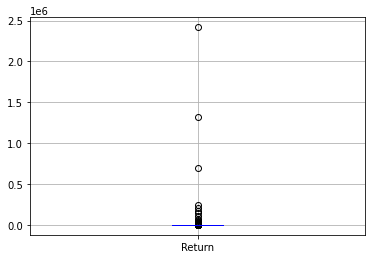

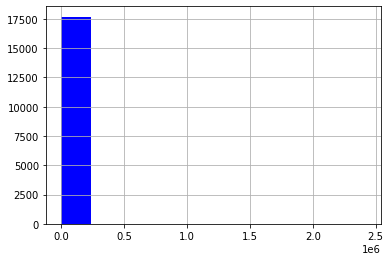

In [32]:
train_data.boxplot(column='Return', color = "blue", patch_artist = "False")
plt.show()

train_data['Return'].hist(bins=10, color = "blue")
plt.show()

- Después de ver estos gráficos queda, en cierto sentido, demostrado que unos cuantos valores que se escapan de la distribución, deben ser culpables de el promedio sesgado de esta variable `Return`. Datos como la desviación estándar (bastante grande) y los cuartiles (visualizados en el Caja-Bigote) soportan también esta teoría. 


2. **`Free Cash Flow`**: Nuevamente observamos un promedio bastante alto que bordea los 440 millones. Esto puede ser más realista, y al observar los valores de los cuartiles, notamos que esta variable tiene un recorrido bastante ampliio. En el Caja Bigote y el Histograma ilustrados podemos observar más atentamente lo dicho anteriormente.

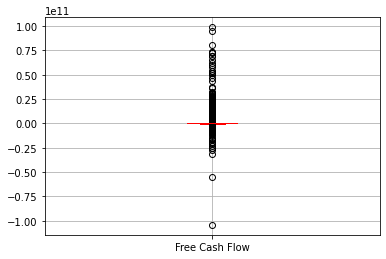

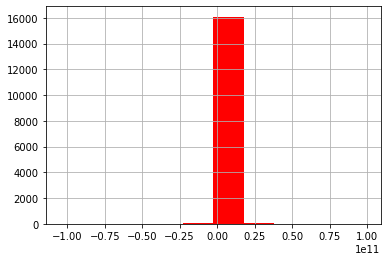

In [33]:
train_data.boxplot(column='Free Cash Flow', color = "red", patch_artist = "True")
plt.show()

train_data['Free Cash Flow'].hist(bins=10, color = "red")
plt.show()

- Viendo el caja bigote podemos notar que hay outliers notorios, especialmente en los valores inferiores de esta columna. Además la desviación estándar, por el recorrido amplio de esta variable, es bastante alta. 

3. **`Goodwill and Intangible Assets`**: Notamos que el mínimo de esta columna es coherente (no existe Goodwill negativo). Era de esperar que esta variable tuviera también un amplio recorrido, lo cual se refleja en sus cuartiles y en su media bastante grande, que supera los 1000 millones. La distribución se puede ver mejor en el siguiente caja bigote e histograma:

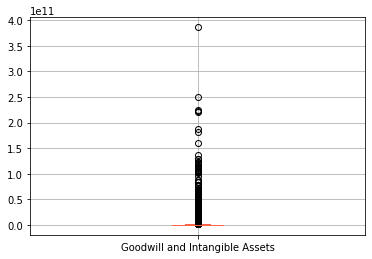

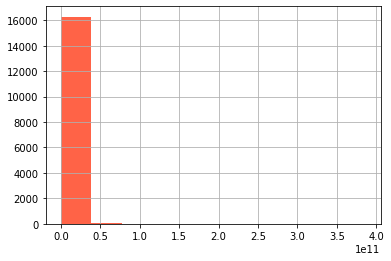

In [34]:
train_data.boxplot(column='Goodwill and Intangible Assets', color = "tomato", patch_artist = "True")
plt.show()

train_data['Goodwill and Intangible Assets'].hist(bins=10, color = "tomato")
plt.show()

- Se puede ver claramente como existen valores que se escapan fuertemente de la caja (un bigote bastante largo). Nuevamente una desviación estándar bastante alta soporta esta teoría de alta dispersión de las variables.

4. **`Dividend per Share`**: Al fin logramos observar distribuciones con valores menos abultados. Tenemos una media de 15.676 y un caja bigote e histograma, que ilustran la distribución de la variable, que se ve en el siguiente cuadro:

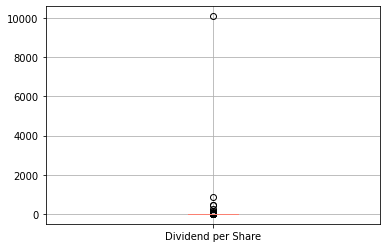

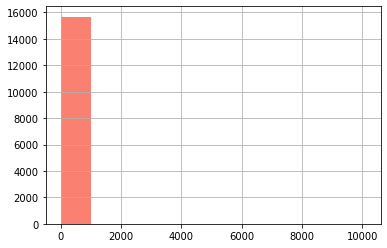

In [35]:
train_data.boxplot(column='Dividend per Share', color = "salmon", patch_artist = "True")
plt.show()

train_data['Dividend per Share'].hist(bins=10, color = "salmon")
plt.show()

- Sin embargo aún no nos libramos de los outliers... estos deberán ser tratados en las misiones futuras. En este caso es brutal como una sola acción hace que nuestro caja bigote nuevamente se vea totalmente comprimido a la parte inferior del cuadro graficado. Este outlier es también culpable de una desviación estándar, completamente desproporcional a lo que realmente debiera ser, si ese dato se omitiese.

5. **`Debt Equity Ratio`**: Al trabajar con una razón o fracción entre la deuda y el patrimonio, no se debieran ver medias muy lejanas a un valor entre 0 y 1. El momento de la media, es coherente con esto y los distintos cuartiles también soportan esta teoría, con una mediana y media cercanas a 0,5. El caja bigote e histograma, para esta variable es el siguiente:

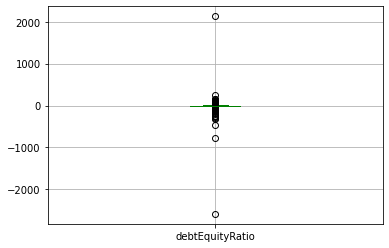

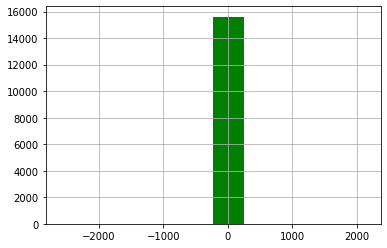

In [36]:
train_data.boxplot(column='debtEquityRatio', color = "green", patch_artist = "True")
plt.show()

train_data['debtEquityRatio'].hist(bins=10, color = "green")
plt.show()

- Nuevamente notamos el mismo problema, outliers fuertemente distanciados, y en este caso hacia arriba y también hacia abajo (abultando la desviación estándar). Claramente los outliers tendrán que ser tratados en la fase de limpieza y depuración de los datos.

6. **`Market Capitalization`**: Esta variable es de esperar que tenga mucha dispersión y que este afectada por outliers que muevan la aguja en los distintos momentos. La media para esta variable supera los 10.000 millones y notamos que existe una gran desviación estándar, con la caja entre los 100 y 1000 millones de dólares. La media es lejana a la mediana. 

- Además el mínimo es coherente, encontrándose este en el cero. La desviación estándar es realmente tremenda. El tema de la dispersión de los datos se puede entender mejor en el siguiente Caja-Bigote e histograma:

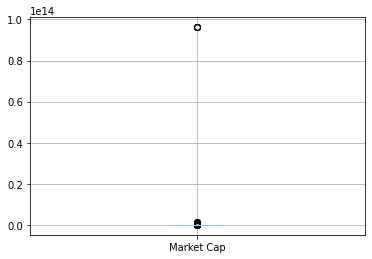

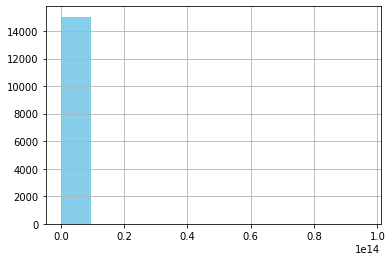

In [37]:
train_data.boxplot(column='Market Cap', color = "skyblue", patch_artist = "True")
plt.show()

train_data['Market Cap'].hist(bins=10, color = "skyblue")
plt.show()

- Nuevamente notamos que tenemos un outlier que se escapa del resto de los datos hacia arriba (no pueden escaparse hacia abajo, porque esta limitado por el cero). La desviación estándar es así de tremenda, nuevamente por la presencia de outliers.

7. **`Class`**: Al ser esta una variable dicotómica, no tenemos problemas de Outliers. Al observar la media podemos notar que existen más acciones convenientes de comprar que no convenientes, pero no por mucha diferencia (la media es de 0.515). Notamos además que los valores de esta columna dicotómica son coherentes, teniendo como máximo a 1 y mínimo a 0. 

- Para esta variable no tiene sentido graficar un boxplot, ya que la dispersión de los datos entre una opción u otra no se visualiza. En este caso se hace solo un histograma para entender mejor la dispersión.

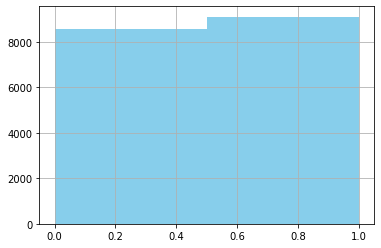

In [38]:
train_data['Class'].hist(bins=2, color = "skyblue")
plt.show()

- La siguiente tabla también es bastante útil ya que, al igual que el histograma, nos muestra que efectivamente hay más acciones convenientes de comprar que menos, en nuestra data de entrenamiento. Más abajo en la descripción de la Variable `Sector` se hace una tabla dinámica interesante que involucra esta variable `Class`.

In [39]:
train_data["Class"].value_counts()

1    9113
0    8572
Name: Class, dtype: int64

8. **`ROE`**: Esta variable tiene un recorrido menos amplio que la gran mayoría de las otras. Sin embargo, el hecho de que la media se distancia de la mediana, es signo de que esta columna también esta contaminada por outliers, que deberán ser tratados en la Misión 2. El siguiente Caja-Bigote y el Histograma Rosado, es fiel reflejo de la dispersión contaminada de los datos:

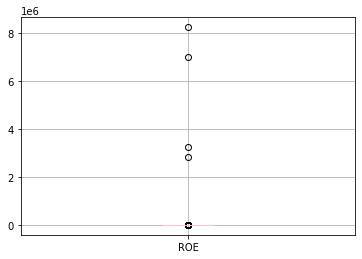

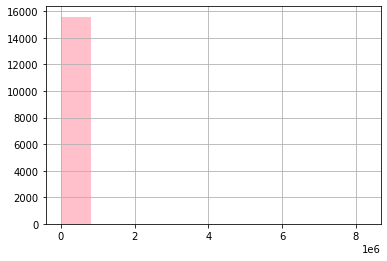

In [40]:
train_data.boxplot(column='ROE', color = "pink", patch_artist = "True")
plt.show()

train_data['ROE'].hist(bins=10, color = "pink")
plt.show()

- Notamos que nuevamente tenemos outliers hacia arriba, con 4 que se escapan bastante de la caja y del bigote. Nuevamente esta contaminación de los outliers tiene las mismas consecuencias ya mencionadas en los análisis de las otras variables.

9. **`Price Book Value Ratio`**: Al ser esta variable una razón, debieramos tener recorridos menos amplios. Sin embargo, el máximo y el mínimo de esta columna no soportan esta hipótesis, probablemente por la presencia de outliers como se ha visto en las demás columnas. La media es superior a 15000 y la mediana es bastante cercana a cero. Viendo el boxplot de esta columna notamos que efectivamente hay presencia de Outliers. El histograma muestra la distribución concentrada, y aparece una sola barra grande por la presencia de outliers...

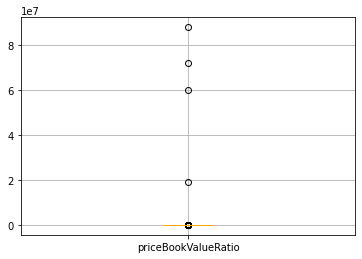

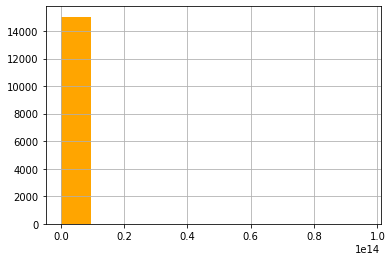

In [41]:
train_data.boxplot(column='priceBookValueRatio', color = "orange", patch_artist = "True")
plt.show()

train_data['Market Cap'].hist(bins=10, color = "orange")
plt.show()

- Efectivamente, notamos que existen outliers en la distribución. Además es interesante ver lo compacto de la caja. Esto se puede deber a dos razones:
1. A que el gráfico se ajustó de esa manera, para representar fielmente a todos los datos, incluidos a los outliers. 
2. A que los datos están bastante condensados, y solo unos pocos se escapan de esta tendencia.

- Fuera de esto, los datos claramente sufren las consecuencias de la presencia de estos valores extremos, con desviaciones estándar descomunales y con medias lejanas a la mediana.

10. **`Sector`**: Esta variable cualitativa, no queda dentro de la tablita del describe. Sin embargo, es importante analizarla. Tenemos que una gran mayoría de las empresas que transan acciones (que están en nuestra base de datos) son del sector financiero, luego del sector de cuidado de la salud y luego de Tecnología. Hoy en día con la crisis del coronavirus, se ha puesto en evidencia el hecho de que ciertos sectores son más vulnerables a los nuevos tiempos. Por lo que en las misiones siguientes será vital tener en cuenta el sector de la acción para ver si esta es recomendable o no (en temas de mayor o menor retorno).

In [42]:
train_data["Sector"].value_counts()

Financial Services        3896
Healthcare                2614
Technology                2490
Industrials               2194
Consumer Cyclical         1965
Basic Materials           1068
Real Estate                986
Energy                     969
Consumer Defensive         731
Utilities                  416
Communication Services     356
Name: Sector, dtype: int64

- A modo de entender mejor esta variable se procede a armar una tabla dinámica que muestre la media de retorno para cada uno de los sectores y para cada una de las clases de acción. 

- **NOTA :EN LA MISIÓN 3 SE REVISARÁN ESTAS MISMAS TABLAS PERO CON LA LIMPIEZA DE DATOS DE LA MISIÓN 2 YA REALIZADA.**

In [43]:
dinamica = train_data.pivot_table("Return", index = "Sector")

rank = dinamica.reindex(dinamica['Return'].sort_values(ascending=False).index)

display(rank)

Return
Sector                             
Real Estate             2471.460618
Technology               416.262110
Financial Services       398.621528
Healthcare               271.258969
Basic Materials           74.724027
Consumer Cyclical         16.189711
Utilities                 11.571233
Consumer Defensive        10.403937
Communication Services     5.150385
Industrials                3.626047
Energy                    -2.378631

- Es interesante notar cuales son los sectores con acciones de mayor retorno promedio. El top 3 está conformado por el sector de Real Estate o inmobiliario (que si bien tiene mayor retorno es bastante cíclico [sufre de las fluctuaciones del mercado]), luego por las Tech-Companies ya que son las compañías que *la llevan* hoy en día y finalmente las de los sectores financieros, que son verdaderas maquinitas de dinero. Las de peor retorno promedio son las de energía, pero suelen ser bastante seguras y poco volátiles. Este ranking es en cierto sentido coherente con el modelo de CAPM, ya que señala que las acciones de mayor retornos son las más cíclicas o volátiles y las de menor retorno las más seguras o menos volátiles. 

- La siguiente tabla divide los datos por sector y por clase; y presenta la media del retorno de cada uno de estos 22 grupos. Notamos que Class, efectivamente considera el retorno como una variable importante a la hora de decidir si la acción es conveniente o no (valor 1 de la columna `Class`), lo cual se demuestra para cada uno de los sectores.

In [44]:
train_data.pivot_table("Return", index = "Sector", columns = "Class")

Class                           0            1
Sector                                        
Basic Materials        -32.983719   194.802167
Communication Services -26.802404    36.393112
Consumer Cyclical      -27.402935    60.004769
Consumer Defensive     -25.349168    40.649618
Energy                 -34.299851    51.621434
Financial Services     -15.921860   694.307269
Healthcare             -40.170639   699.227176
Industrials            -29.622529    34.875593
Real Estate            -16.378520  4356.187237
Technology             -30.483254   793.513751
Utilities              -19.693365    27.601446

## Misión 2: Limpieza y Depuración

En la siguiente misión se deben llevar a cabo 5 resoluciones de conflicto que permitan luego trabajar con los datos. Se deben eliminar los datos vacíos, y reemplazar con un cierto criterio a estos. Además se deben eliminar las incoherencias y los datos extremos o outliers, bajo un cierto criterio.

### 1. Agrupando las Columnas PRICE VAR [%]:

Esta resolución de conflicto ya se realizó en la misión 1. Se hizo con anterioridad, dado que era necesario para poder estudiar la distribución de la variable Retorno de toda la Data de Entrenamiento. Para que no sea necesario subir, el código utilizado más arriba fue el siguiente, habiendo ya revisado que no existiesen datos vacíos en ninguna de las bases de datos, en la columna *Año* PRICE VAR [%]:

In [45]:
#Reemplazo por ceros los NaN
#for i in range(5, 9):
    #string = "201{} PRICE VAR [%]".format(i)
    #train_data[string].fillna(0, inplace = True)
    
#train_data["Return"] = train_data["2015 PRICE VAR [%]"] + train_data["2016 PRICE VAR [%]"] + \
                       #train_data["2017 PRICE VAR [%]"] + train_data["2018 PRICE VAR [%]"] 

#train_data.head()

train_data.apply(lambda x: sum(x.isnull()),axis=0).tail()

Class                 0
2016 PRICE VAR [%]    0
2017 PRICE VAR [%]    0
2018 PRICE VAR [%]    0
Return                0
dtype: int64

Notamos que vía esta resolución de conflicto que agrupó la variable *Año* PRICE VAR [%], ya que al hacer el Concatenate de las bases correspondientes al año 2014, 2015, 2016 y 2017; quedamos con 4 columnas PRICE *Año* VAR [%], que al tener las distintas columnas (de las bases de los distintos años) nombres distintos, quedan con NaN los datos no correspondientes a la base que contiene la columna PRICE *Año* VAR [%] de un año en particular.

De esta forma solucionamos el conflicto de tener 4 columnas distintas que hacen referencia a una misma feature (`Retorno`). Ahora las tenemos agrupado en una sola columna, como se debe.

Como ya no será necesario utilizarlas en futuras misiones, ya que son rebundantes, se procederá a *dropear* las columnas que no se necesitan del tipo *Año* PRICE VAR [%].

In [46]:
for i in range(5, 9):
    string = "201{} PRICE VAR [%]".format(i)
    train_data.drop(string, axis = 1, inplace = True )

train_data.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.705960e+09                    2.705960e+09   
1                       NaN                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   Cash and cash equivalents  Short-term investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+0

### 2. Tratando los NaN (Round 1):

Para las variables que **NO** consideramos dentro de las 10 variables *importantes* en la Misión 1, se procederá a rellenar con la mediana de esa columna todos los datos faltantes. Como se argumenta más abajo, el problema de rellenar con la media en estos datos es que, la media puede estar contaminada por la presencia de Outliers, que se escapan demasiado del resto de la muestra o columna, por eso preferimos ser más conservadores y rellenar estos datos faltantes con el dato de *al medio*.

Primero selecciono las columnas numéricas (no dicotómicas) y las columnas que no pertenecen a las 10 seleccionadas en la Misión 1.

Revisando rápidamente las columnas, se puede notar que hay una columna fuera de las 10 seleccionadas, que podría ser dicotómica, sin embargo si analizamos los valores que toma, notamos que esta es una *excepción*, ya que solo toma el valor de 1. Rellenar los datos faltantes de esta columna con unos, no será problema. Sin embargo, esta variable no presenta datos vacíos. Y ade´mas como no aporta ninguna variabilidad, y por lo tanto información, a un futuro posible modelo, se podría incluso *dropear*.

In [47]:
train_data["operatingProfitMargin"].value_counts()

1.0    15170
Name: operatingProfitMargin, dtype: int64

In [48]:
train_data["operatingProfitMargin"].describe()

count    15170.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: operatingProfitMargin, dtype: float64

In [49]:
columnas = ["operatingProfitMargin", "Class"]

train_data[columnas].apply(lambda x: sum(x.isnull()),axis=0)

operatingProfitMargin    2515
Class                       0
dtype: int64

Ahora armamos el set de columnas que vamos a utilizar para rellenar con la mediana.

In [50]:
cols = [col for col in train_data.columns if col not in ["Return", "Free Cash Flow", \
                                                         "Goodwill and Intangible Assets", \
                                                         "Dividend per Share", \
                                                         "debtEquityRatio", \
                                                         "Market Cap", "Class", \
                                                         "ROE", "priceBookValueRatio", \
                                                         "Sector", "Unnamed: 0"
                                                        ]]

train_data[cols]

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1      3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2      9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3      2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4      1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...             ...             ...              ...           ...   
17680  6.257258e+07          0.0258     5.232652e+07  1.024606e+07   
17681  1.065240e+08         -0.0677     1.290900e+07  9.361500e+07   
17682  1.040000e+08             NaN     7.700000e+07  2.700000e+07   
17683  1.605670e+08         -0.0246     1.334910e+08  2.707600e+07   
17684  4.607800e+07          0.4709     2.681700e+07  1.926100e+07   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0      0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1      1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2      0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3      0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4      0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   
...             ...           ...                 ...               ...   
17680  0.000000e+00  9.683601e+06        9.683601e+06      5.624630e+05   
17681  9.224000e+06  7.984600e+07        8.907000e+07      4.545000e+06   
17682           NaN  2.500000e+07        2.700000e+07      0.000000e+00   
17683  0.000000e+00  1.926300e+07        1.926300e+07      7.813000e+06   
17684  4.395000e+06  1.798700e+07        2.238200e+07     -3.121000e+06   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
0          7.090000e+08         1.449400e+10        2.851000e+09   
1          1.214869e+07         1.753823e+08        3.955957e+07   
2          4.430000e+08         2.270000e+09        7.510000e+08   
3          4.245910e+08         2.502180e+08        8.040000e+05   
4          3.024000e+08         2.707700e+09        8.833000e+08   
...                 ...                  ...                 ...   
17680      0.000000e+00         5.311890e+05        2.630000e+05   
17681      0.000000e+00         6.656000e+06        3.126000e+06   
17682      1.000000e+06        -2.000000e+06        0.000000e+00   
17683     -6.990000e+05         8.553000e+06        3.491000e+06   
17684      2.960000e+05        -3.246000e+06        1.247000e+06   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          1.420000e+08                  -1.127000e+09   
1                         -1.431918e+07                   0.000000e+00   
2                          1.200000e+07                   0.000000e+00   
3                          0.000000e+00                   0.000000e+00   
4                          3.690000e+07                   0.000000e+00   
...                                 ...                            ...   
17680                      4.577800e+04                   0.000000e+00   
17681                      0.000000e+00                  -1.938000e+06   
17682                               NaN                            NaN   
17683                      0.000000e+00                   0.000000e+00   
17684                      0.000000e+00                   0.000000e+00   

         Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0      1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1      1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2      1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3      2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4      1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   
...             ...                  ...             ...     ...          ... 

Luego a las columnas numéricas, y las no pertenecientes a las 10 seleccionadas se rellenarán los datos vacíos con la media de la columna. De esta forma, se logra resolver el conflicto de valores faltantes en estas columnas.

In [51]:
train_data[cols] = train_data[cols].apply(lambda x: x.fillna(x.median()),axis=0)

In [52]:
train_data[cols].apply(lambda x: sum(x.isnull()),axis=0)

Revenue                        0
Revenue Growth                 0
Cost of Revenue                0
Gross Profit                   0
R&D Expenses                   0
                              ..
Asset Growth                   0
Book Value per Share Growth    0
Debt Growth                    0
R&D Expense Growth             0
SG&A Expenses Growth           0
Length: 214, dtype: int64

In [53]:
train_data.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.705960e+09                    2.705960e+09   
1              4.300000e+07                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   Cash and cash equivalents  Short-term investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+0

**Aplicando el criterio a la Data de Testeo (Año 2018)**:

Como se vió en clases, se debe aplicar el mismo criterio de resolución de conflicto en la Data de Testeo, pero además no podemos usar información de la Data de Testeo para imputar estos valores. En otras palabras, la Data de Testeo es en cierto sentido Víctima de las decisiones tomadas para las base del 2014 al 2017 (`train_data`).

Por lo tanto debemos proceder a trabajar desde ya la data del 2018, de ahora en adelante `test_data`.


In [54]:
test_data = data_2018
test_data.tail()

Unnamed: 0     Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
4387       YRIV         0.0          0.0000              0.0           0.0   
4388       YTEN    556000.0         -0.4110              0.0      556000.0   
4389       ZKIN  54884381.0          0.2210       36593792.0    18290589.0   
4390        ZOM         0.0          0.0000              0.0           0.0   
4391       ZYME  53019000.0          0.0243              0.0    53019000.0   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
4387           0.0     3755251.0           3755251.0        -3755251.0   
4388     4759000.0     5071000.0           9830000.0        -9274000.0   
4389     1652633.0     7020320.0           8672953.0         9617636.0   
4390    10317153.0     4521349.0          16648628.0       -16648628.0   
4391    56684000.0    29457000.0          86146000.0       -33127000.0   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
4387        11058486.0          -14824510.0          -1108025.0   
4388               0.0           -9170000.0                 0.0   
4389         1239170.0            8416324.0           1398210.0   
4390               0.0          -16647687.0                 0.0   
4391          166000.0          -34385000.0           2171000.0   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
4387                               0.0                            0.0   
4388                               0.0                            0.0   
4389                           84943.0                            0.0   
4390                               0.0                            0.0   
4391                               0.0                            0.0   

      Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
4387 -13716485.0                  0.0     -13716485.0 -0.08        -0.08   
4388  -9170000.0                  0.0      -9170000.0 -0.92        -0.92   
4389   7018114.0                  0.0       7018114.0  0.52         0.52   
4390 -16647687.0                  0.0     -16647687.0 -0.18        -0.18   
4391 -36556000.0                  0.0     -36556000.0 -1.26        -1.26   

      Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
4387                       NaN                     172423743.0   
4388                10025811.0                       9932487.0   
4389                13068346.0                      13610046.0   
4390                94796209.0                      93440341.0   
4391                31966770.0                      29089896.0   

      Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
4387                 0.0        0.0000         -0.672       0.0000   
4388                 0.0        1.0000        -16.140     -16.4928   
4389                 0.0        0.3333          0.183       0.1759   
4390                 0.0        0.0000            NaN       0.0000   
4391                 0.0        1.0000         -0.577      -0.6454   

      Profit Margin  Free Cash Flow margin      EBITDA        EBIT  \
4387         -1.231                 0.0000  -3757783.0  -3766024.0   
4388        -16.493               -15.8201  -8974000.0  -9170000.0   
4389          0.128                -0.0492  10063235.0   9655494.0   
4390            NaN                 0.0000 -16441920.0 -16647687.0   
4391         -0.689                 0.4409 -30589000.0 -34219000.0   

      Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
4387          -13716485.0                      0.0000             0.0000   
4388           -9170000.0                    -16.4928           -16.4928   
4389            7103057.0                      0.1533             0.1279   
4390          -16647687.0                      0.0000             0.0000   
4391          -36556000.0                     -0.6485            -0.6895   

      Cash and cash equivalents  Short-term investments  \
4387                   120796.0      

Además aprovecho de agregar una columna `Return` que en este caso corresponde solo a la columna `2019 PRICE VAR [%]`, y botamos la columna PRICE VAR, de esta forma tenemos ambas bases de datos con las mismas features. No es necesario entonces, hacer la agregación de columnas que se hizo en la primera resolución de conflicto. Por esta razón, se parte resolviendo conflictos en la data de testeo, recién en esta segunda resolución de conflicto.

In [55]:
test_data["Return"] = test_data["2019 PRICE VAR [%]"]

test_data.drop('2019 PRICE VAR [%]', axis = 1, inplace = True )

test_data.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1        KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2       INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3         MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4         GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1  0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2  1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3  2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4  0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      3.542000e+09         1.511100e+10        3.380000e+09   
1      1.917000e+09         2.196000e+09        5.870000e+08   
2     -1.260000e+08         2.331700e+10        2.264000e+09   
3      3.420000e+08         1.430300e+10        1.680000e+08   
4      5.059000e+09        -2.177200e+10        5.830000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                       131000000.0                   0.000000e+00   
1                       310000000.0                   0.000000e+00   
2                               0.0                   0.000000e+00   
3                         3000000.0                   0.000000e+00   
4                      -178000000.0                   1.726000e+09   

     Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0  1.173100e+10                  0.0    1.173100e+10   2.56         2.53   
1  1.609000e+09          128000000.0    1.481000e+09   0.66         0.66   
2  2.105300e+10                  0.0    2.105300e+10   4.57         4.48   
3  1.413500e+10                  0.0    1.413500e+10  12.27        11.51   
4 -2.235500e+10          894000000.0   -2.280200e+10  -2.62        -2.62   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              4.549505e+09                    4.549505e+09   
1              2.207018e+09                    2.216000e+09   
2              4.564000e+09                    4.611000e+09   
3              1.159811e+09                    1.152000e+09   
4              8.698115e+09                    8.698115e+09   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               0.917        1.0000          0.310       0.1974   
1               0.725        0.4847          0.453       0.2908   
2               1.200        0.6173          0.456       0.3273   
3               0.000        0.5887          0.638       0.4819   
4               0.370        0.2151         -0.070      -0.1374   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0          0.124                 0.1268  2.932900e+10  1.865300e+10   
1          0.105                 0.1498  6.410000e+09  4.113000e+09   
2          0.297                 0.2011  3.227600e+10  2.319100e+10   
3          0.465                 0.2804  1.940400e+10  1.464500e+10   
4         -0.187                 0.0058 -8.489000e+09 -1.671300e+10   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.186200e+10                      0.1599             0.1241   
1         1.919000e+09                      0.1553             0.1138   
2         2.105300e+10                      0.3291             0.2972   
3         1.413800e+10                      0.4706             0.4651   
4        -2.244300e+10                     -0.1790            -0.1838   

   Cash and cash equivalents  Short-term investments  \
0               3.814000e+09            0.000000e+00   
1               3.280000e+09            0.000000e+00   
2               3.019000e+09     

Entonces ahora podemos proceder a imputar la mediana de las columnas de la data de entrenamiento, sobre los datos vacíos de nuestra `test_data`.

In [56]:
for col in cols:
    mediana = train_data[col].median()
    test_data[col].fillna(mediana, inplace = True)
    
test_data[cols]

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0     9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1     1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2     7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3     3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4     1.216150e+11          0.0285     9.546100e+10  2.615400e+10   
...            ...             ...              ...           ...   
4387  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1     0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2     1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3     2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4     0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   
...            ...           ...                 ...               ...   
4387  0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
4388  4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
4389  1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
4390  1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
4391  5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         3.542000e+09         1.511100e+10        3.380000e+09   
1         1.917000e+09         2.196000e+09        5.870000e+08   
2        -1.260000e+08         2.331700e+10        2.264000e+09   
3         3.420000e+08         1.430300e+10        1.680000e+08   
4         5.059000e+09        -2.177200e+10        5.830000e+08   
...                ...                  ...                 ...   
4387      1.105849e+07        -1.482451e+07       -1.108025e+06   
4388      0.000000e+00        -9.170000e+06        0.000000e+00   
4389      1.239170e+06         8.416324e+06        1.398210e+06   
4390      0.000000e+00        -1.664769e+07        0.000000e+00   
4391      1.660000e+05        -3.438500e+07        2.171000e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          131000000.0                   0.000000e+00   
1                          310000000.0                   0.000000e+00   
2                                  0.0                   0.000000e+00   
3                            3000000.0                   0.000000e+00   
4                         -178000000.0                   1.726000e+09   
...                                ...                            ...   
4387                               0.0                   0.000000e+00   
4388                               0.0                   0.000000e+00   
4389                           84943.0                   0.000000e+00   
4390                               0.0                   0.000000e+00   
4391                               0.0                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0     1.173100e+10                  0.0    1.173100e+10   2.56         2.53   
1     1.609000e+09          128000000.0    1.481000e+09   0.66         0.66   
2     2.105300e+10                  0.0    2.105300e+10   4.57         4.48   
3     1.413500e+10                  0.0    1.413500e+10  12.27        11.51   
4    -2.235500e+10          894000000.0   -2.280200e+10  -2.62        -2.62   
...            ...                  ...             ...    ...          ...   
4387 -1.371648e+07                  0.0   -1.371648e+07  -

In [57]:
test_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1           KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2          INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3            MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4            GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   
...         ...           ...             ...              ...           ...   
4387       YRIV  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388       YTEN  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389       ZKIN  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390        ZOM  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391       ZYME  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1     0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2     1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3     2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4     0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   
...            ...           ...                 ...               ...   
4387  0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
4388  4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
4389  1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
4390  1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
4391  5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         3.542000e+09         1.511100e+10        3.380000e+09   
1         1.917000e+09         2.196000e+09        5.870000e+08   
2        -1.260000e+08         2.331700e+10        2.264000e+09   
3         3.420000e+08         1.430300e+10        1.680000e+08   
4         5.059000e+09        -2.177200e+10        5.830000e+08   
...                ...                  ...                 ...   
4387      1.105849e+07        -1.482451e+07       -1.108025e+06   
4388      0.000000e+00        -9.170000e+06        0.000000e+00   
4389      1.239170e+06         8.416324e+06        1.398210e+06   
4390      0.000000e+00        -1.664769e+07        0.000000e+00   
4391      1.660000e+05        -3.438500e+07        2.171000e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          131000000.0                   0.000000e+00   
1                          310000000.0                   0.000000e+00   
2                                  0.0                   0.000000e+00   
3                            3000000.0                   0.000000e+00   
4                         -178000000.0                   1.726000e+09   
...                                ...                            ...   
4387                               0.0                   0.000000e+00   
4388                               0.0                   0.000000e+00   
4389                           84943.0                   0.000000e+00   
4390                               0.0                   0.000000e+00   
4391                               0.0                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0     1.173100e+10                  0.0    1.173100e+10   2.56         2.53   
1     1.609000e+09          128000000.0    1.481000e+09   0.66         0.66   
2     2.105300e+10                  0.0    2.105300e+10   4.57         4.48   
3     1.413500e+10                  0.0    1.413500e+10  12.27        11.51   
4    -2.235500e+10          894000000.0   -2.280200e+10  -2.62        -2.62   

In [58]:
test_data[cols].apply(lambda x: sum(x.isnull()),axis=0)

Revenue                        0
Revenue Growth                 0
Cost of Revenue                0
Gross Profit                   0
R&D Expenses                   0
                              ..
Asset Growth                   0
Book Value per Share Growth    0
Debt Growth                    0
R&D Expense Growth             0
SG&A Expenses Growth           0
Length: 214, dtype: int64

### 3. Tratando los NaN (Round 2):

En esta resolución de conflicto se rellenan los valores faltantes de las 10 columnas seleccionadas en la misión 1. Eso si, primero debemos revisar en que columnas de las 10 existen datos faltantes:


In [59]:
diez = ["Return", "Free Cash Flow","Goodwill and Intangible Assets",  "Dividend per Share", \
        "debtEquityRatio", "Market Cap", "Class", "ROE", "priceBookValueRatio", "Sector"]

train_data[diez].apply(lambda x: sum(x.isnull()),axis=0)

Return                               0
Free Cash Flow                    1472
Goodwill and Intangible Assets    1295
Dividend per Share                2009
debtEquityRatio                   2063
Market Cap                        2643
Class                                0
ROE                               2084
priceBookValueRatio               4163
Sector                               0
dtype: int64

In [60]:
test_data[diez].apply(lambda x: sum(x.isnull()),axis=0)

Return                              0
Free Cash Flow                    167
Goodwill and Intangible Assets    142
Dividend per Share                250
debtEquityRatio                   251
Market Cap                        428
Class                               0
ROE                               256
priceBookValueRatio               830
Sector                              0
dtype: int64

Estudiemos como se comportan las distintas columnas con datos vacíos según la Class que tiene. En otras palabras, se hará por cada una de las variables de la lista de las `Diez` (que tengan datos vacíos), una tabla dinámica que muestre la mediana de cada columna según si las muestras pertenecen a un cierto sector, y si son de una Clase de la clase 0 o 1. Usamos la mediana, porque como vimos en la Misión 1, la muestra esta fuertemente contaminada con la presencia de outliers que se escapan de la realidad, por eso creo que una buena forma de evitar esta influencia, es pararse en el dato de al medio (con la columna ordenada) y reemplazar por ese dato.

In [61]:
diez_con_nan = ["Free Cash Flow", 'Goodwill and Intangible Assets', 'Dividend per Share', 'debtEquityRatio', \
                'Market Cap', 'ROE', 'priceBookValueRatio']

for col in diez_con_nan:
    print('\n\n')
    print("\t Tabla para la Variable {} \n".format(col))
    table = train_data.pivot_table(values= col , index='Sector', columns = "Class", aggfunc=np.median)
    display(table)




	 Tabla para la Variable Free Cash Flow 



Class                              0             1
Sector                                            
Basic Materials         1.842050e+07  3.671000e+07
Communication Services  1.857425e+08  8.812250e+07
Consumer Cyclical       3.700000e+07  6.825750e+07
Consumer Defensive      3.098037e+07  7.074500e+07
Energy                  2.630000e+05  5.570000e+05
Financial Services      4.582200e+07  3.006200e+07
Healthcare             -1.407802e+07 -3.777724e+06
Industrials             1.880000e+07  5.514300e+07
Real Estate             1.700000e+07  5.593000e+06
Technology              3.743666e+06  1.900000e+07
Utilities               2.513500e+06  5.513135e+06




	 Tabla para la Variable Goodwill and Intangible Assets 



Class                              0             1
Sector                                            
Basic Materials         1.678100e+07  6.360000e+07
Communication Services  1.367908e+09  5.947187e+08
Consumer Cyclical       1.207650e+08  1.609610e+08
Consumer Defensive      9.907100e+07  1.789810e+08
Energy                  2.906500e+06  0.000000e+00
Financial Services      2.827300e+07  1.608500e+07
Healthcare              1.422530e+05  8.126000e+06
Industrials             7.317800e+07  1.721560e+08
Real Estate             0.000000e+00  0.000000e+00
Technology              3.378100e+07  6.889500e+07
Utilities               1.643230e+08  1.541500e+08




	 Tabla para la Variable Dividend per Share 



Class                       0        1
Sector                                
Basic Materials         0.000  0.01900
Communication Services  0.000  0.00000
Consumer Cyclical       0.000  0.05000
Consumer Defensive      0.000  0.12640
Energy                  0.080  0.21185
Financial Services      0.400  0.36000
Healthcare              0.000  0.00000
Industrials             0.000  0.19210
Real Estate             0.900  1.03900
Technology              0.000  0.00000
Utilities               0.725  1.23550




	 Tabla para la Variable debtEquityRatio 



Class                         0        1
Sector                                  
Basic Materials         0.42230  0.49565
Communication Services  1.00310  0.72735
Consumer Cyclical       0.40350  0.46655
Consumer Defensive      0.54530  0.38825
Energy                  0.58050  0.57650
Financial Services      0.65950  0.63730
Healthcare              0.00190  0.03890
Industrials             0.57375  0.56135
Real Estate             1.16830  1.15750
Technology              0.09680  0.10690
Utilities               1.09660  1.13950




	 Tabla para la Variable Market Cap 



Class                              0             1
Sector                                            
Basic Materials         1.105484e+09  1.191270e+09
Communication Services  2.309820e+09  2.724566e+09
Consumer Cyclical       1.111812e+09  1.747513e+09
Consumer Defensive      1.191244e+09  1.818315e+09
Energy                  1.967453e+09  1.809515e+09
Financial Services      8.371338e+08  6.233506e+08
Healthcare              2.580743e+08  5.537852e+08
Industrials             7.311176e+08  1.228590e+09
Real Estate             1.626285e+09  1.792203e+09
Technology              5.547977e+08  1.157950e+09
Utilities               2.217562e+09  3.597588e+09




	 Tabla para la Variable ROE 



Class                         0        1
Sector                                  
Basic Materials         0.04870  0.04970
Communication Services  0.05455  0.06725
Consumer Cyclical       0.10020  0.12295
Consumer Defensive      0.10220  0.12150
Energy                  0.03735 -0.03325
Financial Services      0.07780  0.08550
Healthcare             -0.34285 -0.02695
Industrials             0.08385  0.10680
Real Estate             0.04980  0.06110
Technology              0.02800  0.05525
Utilities               0.09050  0.09010




	 Tabla para la Variable priceBookValueRatio 



Class                         0        1
Sector                                  
Basic Materials         2.15860  2.06210
Communication Services  2.04885  1.93575
Consumer Cyclical       2.18060  2.42730
Consumer Defensive      2.42250  2.90540
Energy                  1.46030  1.40815
Financial Services      1.43080  1.22040
Healthcare              3.08300  2.99150
Industrials             2.13290  2.41180
Real Estate             1.58535  1.53510
Technology              2.43750  2.67660
Utilities               1.89950  1.82500

Notamos rápidamente que los distintos grupos tienen medias distintas en general. Por ello dado que estas variables serán más importantes (por el criterio de selección dicho en la M1), procuraremos ser más específicos en el *relleno* de los valores nulos. Utilizando la media de la categoría a la cual corresponde esta observación, para hacer este *relleno*. Un ejemplo característico de esto, es

Hay solo una de estas variables que no presenta gran diferencia entre los distintos grupos, esta es la tabla correspondiente a la columna `Dividend per Share`. Por esta razón, dado que no es necesario diferenciar las medias a utilizar como *relleno*, se rellenan los datos faltantes de esa columna con la media de esa columna completa. Partamos por eso:

In [62]:
media = train_data['Dividend per Share'].mean()
train_data["Dividend per Share"].fillna(media, inplace = True)
test_data["Dividend per Share"].fillna(media, inplace = True)

Revisamos que efectivamente se hayan reemplazado todos estos datos vacíos, en la data de entrenamiento y en la de Testeo.

In [63]:
train_data[diez].apply(lambda x: sum(x.isnull()),axis=0)

Return                               0
Free Cash Flow                    1472
Goodwill and Intangible Assets    1295
Dividend per Share                   0
debtEquityRatio                   2063
Market Cap                        2643
Class                                0
ROE                               2084
priceBookValueRatio               4163
Sector                               0
dtype: int64

In [64]:
test_data[diez].apply(lambda x: sum(x.isnull()),axis=0)

Return                              0
Free Cash Flow                    167
Goodwill and Intangible Assets    142
Dividend per Share                  0
debtEquityRatio                   251
Market Cap                        428
Class                               0
ROE                               256
priceBookValueRatio               830
Sector                              0
dtype: int64

Notamos rápidamente que estamos OK. Es decir, nos deshicimos exitosamente de los datos vacíos.

Ahora procedamos con rellenar los datos faltantes de cada una de las columnas que aún nos quedan con datos vacíos de nuestras 10 originales. Para esto usaremos la función `fage` que se nos entregó en la materia de clases.

In [65]:
train_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0             PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1           VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2             KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3            RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4            GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...          ...           ...             ...              ...           ...   
17680       TSRI  6.257258e+07          0.0258     5.232652e+07  1.024606e+07   
17681       TZOO  1.065240e+08         -0.0677     1.290900e+07  9.361500e+07   
17682      USATP  1.040000e+08          0.0521     7.700000e+07  2.700000e+07   
17683       WSTG  1.605670e+08         -0.0246     1.334910e+08  2.707600e+07   
17684        WTT  4.607800e+07          0.4709     2.681700e+07  1.926100e+07   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0      0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1      1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2      0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3      0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4      0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   
...             ...           ...                 ...               ...   
17680  0.000000e+00  9.683601e+06        9.683601e+06      5.624630e+05   
17681  9.224000e+06  7.984600e+07        8.907000e+07      4.545000e+06   
17682  0.000000e+00  2.500000e+07        2.700000e+07      0.000000e+00   
17683  0.000000e+00  1.926300e+07        1.926300e+07      7.813000e+06   
17684  4.395000e+06  1.798700e+07        2.238200e+07     -3.121000e+06   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
0          7.090000e+08         1.449400e+10        2.851000e+09   
1          1.214869e+07         1.753823e+08        3.955957e+07   
2          4.430000e+08         2.270000e+09        7.510000e+08   
3          4.245910e+08         2.502180e+08        8.040000e+05   
4          3.024000e+08         2.707700e+09        8.833000e+08   
...                 ...                  ...                 ...   
17680      0.000000e+00         5.311890e+05        2.630000e+05   
17681      0.000000e+00         6.656000e+06        3.126000e+06   
17682      1.000000e+06        -2.000000e+06        0.000000e+00   
17683     -6.990000e+05         8.553000e+06        3.491000e+06   
17684      2.960000e+05        -3.246000e+06        1.247000e+06   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          1.420000e+08                  -1.127000e+09   
1                         -1.431918e+07                   0.000000e+00   
2                          1.200000e+07                   0.000000e+00   
3                          0.000000e+00                   0.000000e+00   
4                          3.690000e+07                   0.000000e+00   
...                                 ...                            ...   
17680                      4.577800e+04                   0.000000e+00   
17681                      0.000000e+00                  -1.938000e+06   
17682                      0.000000e+00                   0.000000e+00   
17683                      0.000000e+00                   0.000000e+00   
17684                      0.000000e+00                   0.000000e+00   

         Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0      1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1      1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2      1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3      2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4      1.824400e+09  

In [66]:
diez_con_nan2 = ["Free Cash Flow", 'Goodwill and Intangible Assets', 'debtEquityRatio', \
                'Market Cap', 'ROE', 'priceBookValueRatio']


for col in diez_con_nan2:
    table = train_data.pivot_table(values= col , index='Sector' ,columns='Class', aggfunc=np.median)
    def fage(x):
        return table.loc[x['Sector'],x['Class']]
    
    train_data[train_data[col].isnull()].apply(fage, axis=1)
    train_data[col].fillna(train_data[train_data[col].isnull()].apply(fage, axis=1), inplace=True)    

In [67]:
train_data[diez_con_nan2].apply(lambda x: sum(x.isnull()),axis=0)

Free Cash Flow                    0
Goodwill and Intangible Assets    0
debtEquityRatio                   0
Market Cap                        0
ROE                               0
priceBookValueRatio               0
dtype: int64

Ahora nos gustaría hacer lo mismo con el set de Testeo. Solo que en este caso utilizar la tabla que se origina con las medianas de la data de entrenamiento, para rellenar los datos vacíos de la tabla de Testeo.

In [68]:
for col in diez_con_nan2:
    table = train_data.pivot_table(values= col , index='Sector' ,columns='Class', aggfunc=np.median)
    def fage(x):
        return table.loc[x['Sector'],x['Class']]
    
    test_data[test_data[col].isnull()].apply(fage, axis=1)
    test_data[col].fillna(test_data[test_data[col].isnull()].apply(fage, axis=1), inplace=True)    

In [69]:
test_data[diez_con_nan2].apply(lambda x: sum(x.isnull()),axis=0)

Free Cash Flow                    0
Goodwill and Intangible Assets    0
debtEquityRatio                   0
Market Cap                        0
ROE                               0
priceBookValueRatio               0
dtype: int64

In [70]:
train_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0             PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1           VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2             KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3            RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4            GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...          ...           ...             ...              ...           ...   
17680       TSRI  6.257258e+07          0.0258     5.232652e+07  1.024606e+07   
17681       TZOO  1.065240e+08         -0.0677     1.290900e+07  9.361500e+07   
17682      USATP  1.040000e+08          0.0521     7.700000e+07  2.700000e+07   
17683       WSTG  1.605670e+08         -0.0246     1.334910e+08  2.707600e+07   
17684        WTT  4.607800e+07          0.4709     2.681700e+07  1.926100e+07   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0      0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1      1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2      0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3      0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4      0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   
...             ...           ...                 ...               ...   
17680  0.000000e+00  9.683601e+06        9.683601e+06      5.624630e+05   
17681  9.224000e+06  7.984600e+07        8.907000e+07      4.545000e+06   
17682  0.000000e+00  2.500000e+07        2.700000e+07      0.000000e+00   
17683  0.000000e+00  1.926300e+07        1.926300e+07      7.813000e+06   
17684  4.395000e+06  1.798700e+07        2.238200e+07     -3.121000e+06   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
0          7.090000e+08         1.449400e+10        2.851000e+09   
1          1.214869e+07         1.753823e+08        3.955957e+07   
2          4.430000e+08         2.270000e+09        7.510000e+08   
3          4.245910e+08         2.502180e+08        8.040000e+05   
4          3.024000e+08         2.707700e+09        8.833000e+08   
...                 ...                  ...                 ...   
17680      0.000000e+00         5.311890e+05        2.630000e+05   
17681      0.000000e+00         6.656000e+06        3.126000e+06   
17682      1.000000e+06        -2.000000e+06        0.000000e+00   
17683     -6.990000e+05         8.553000e+06        3.491000e+06   
17684      2.960000e+05        -3.246000e+06        1.247000e+06   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          1.420000e+08                  -1.127000e+09   
1                         -1.431918e+07                   0.000000e+00   
2                          1.200000e+07                   0.000000e+00   
3                          0.000000e+00                   0.000000e+00   
4                          3.690000e+07                   0.000000e+00   
...                                 ...                            ...   
17680                      4.577800e+04                   0.000000e+00   
17681                      0.000000e+00                  -1.938000e+06   
17682                      0.000000e+00                   0.000000e+00   
17683                      0.000000e+00                   0.000000e+00   
17684                      0.000000e+00                   0.000000e+00   

         Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0      1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1      1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2      1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3      2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4      1.824400e+09  

In [71]:
test_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1           KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2          INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3            MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4            GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   
...         ...           ...             ...              ...           ...   
4387       YRIV  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388       YTEN  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389       ZKIN  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390        ZOM  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391       ZYME  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1     0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2     1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3     2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4     0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   
...            ...           ...                 ...               ...   
4387  0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
4388  4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
4389  1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
4390  1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
4391  5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         3.542000e+09         1.511100e+10        3.380000e+09   
1         1.917000e+09         2.196000e+09        5.870000e+08   
2        -1.260000e+08         2.331700e+10        2.264000e+09   
3         3.420000e+08         1.430300e+10        1.680000e+08   
4         5.059000e+09        -2.177200e+10        5.830000e+08   
...                ...                  ...                 ...   
4387      1.105849e+07        -1.482451e+07       -1.108025e+06   
4388      0.000000e+00        -9.170000e+06        0.000000e+00   
4389      1.239170e+06         8.416324e+06        1.398210e+06   
4390      0.000000e+00        -1.664769e+07        0.000000e+00   
4391      1.660000e+05        -3.438500e+07        2.171000e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          131000000.0                   0.000000e+00   
1                          310000000.0                   0.000000e+00   
2                                  0.0                   0.000000e+00   
3                            3000000.0                   0.000000e+00   
4                         -178000000.0                   1.726000e+09   
...                                ...                            ...   
4387                               0.0                   0.000000e+00   
4388                               0.0                   0.000000e+00   
4389                           84943.0                   0.000000e+00   
4390                               0.0                   0.000000e+00   
4391                               0.0                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0     1.173100e+10                  0.0    1.173100e+10   2.56         2.53   
1     1.609000e+09          128000000.0    1.481000e+09   0.66         0.66   
2     2.105300e+10                  0.0    2.105300e+10   4.57         4.48   
3     1.413500e+10                  0.0    1.413500e+10  12.27        11.51   
4    -2.235500e+10          894000000.0   -2.280200e+10  -2.62        -2.62   

### 4. Tratando los Outliers (Round 1):

Como se vió en la misión anterior los outliers están siendo mucho estorbo, lo cual se demuestra en los distintos estadísticos de las 10 columnas representadas.

Para tratar los datos extremos, se seleccionarán todas las columnas con medias bastante grandes (para así solo despejar outliers en columnas que son potencialmente víctimas de outliers). A estas columnas se les aplicará el criterio de eliminar los datos que estén bajo el percentil 0.005 y los que estén sobre el percentil 0.995. 

En el siguiente cuadro se seleccionan las columnas, pero antes selecciono las columnas numéricas para así aplicar luego a mi `train_data`.

In [72]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_data_num = train_data.select_dtypes(include=numerics).fillna(0)

columnas_a_limpiar = []
for col in train_data_num.columns:
    if train_data[col].mean() > 1000000:
        columnas_a_limpiar.append(col)

In [73]:
print(len(columnas_a_limpiar))

61


In [74]:
test_data["Free Cash Flow"].describe()

count    4.392000e+03
mean     4.883573e+08
std      2.992127e+09
min     -6.227011e+10
25%     -9.571750e+06
50%      2.928050e+07
75%      1.950778e+08
max      9.414620e+10
Name: Free Cash Flow, dtype: float64

Notamos que se seleccionaron de manera correcta las columnas. Por ejemplo, la columna `Free Cash Flow`, efectivamente tiene media "grande" y tiene un valor mínimo bastante pequeño.

In [75]:
def util(data, col):
    lim_inf = data[col].quantile(0.005)
    lim_sup = data[col].quantile(0.995)
    cleaned_data = data.loc[(data[col] >= lim_inf) & (data[col] <= lim_sup)]
    return cleaned_data

for col in columnas_a_limpiar:    
    train_data = util(train_data, col)


In [76]:
train_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
32           PBH  5.973810e+08         -0.0367     2.618300e+08   335551000.0   
35           SFM  2.967424e+09          0.2172     2.082221e+09   885203000.0   
42           GNC  2.655006e+09          0.0108     1.674766e+09   980240000.0   
45          TWNK  5.546950e+08          0.0521     3.207630e+08   233932000.0   
47          CHGG  3.048340e+08          0.1927     2.109850e+08    93849000.0   
...          ...           ...             ...              ...           ...   
17680       TSRI  6.257258e+07          0.0258     5.232652e+07    10246064.0   
17681       TZOO  1.065240e+08         -0.0677     1.290900e+07    93615000.0   
17682      USATP  1.040000e+08          0.0521     7.700000e+07    27000000.0   
17683       WSTG  1.605670e+08         -0.0246     1.334910e+08    27076000.0   
17684        WTT  4.607800e+07          0.4709     2.681700e+07    19261000.0   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
32              0.0   133449000.0         146935000.0       188616000.0   
35              0.0   677018000.0         685492000.0       199711000.0   
42              0.0   554882000.0         544942000.0       435298000.0   
45              0.0    90983000.0         114465000.0       119467000.0   
47       49386000.0   114152000.0         158983000.0       -65134000.0   
...             ...           ...                 ...               ...   
17680           0.0     9683601.0           9683601.0          562463.0   
17681     9224000.0    79846000.0          89070000.0         4545000.0   
17682           0.0    25000000.0          27000000.0               0.0   
17683           0.0    19263000.0          19263000.0         7813000.0   
17684     4395000.0    17987000.0          22382000.0        -3121000.0   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
32           68642000.0          101748000.0          29133000.0   
35           25063000.0          174106000.0          66414000.0   
42           46708000.0          392804000.0         136932000.0   
45           37447000.0           77197000.0                 0.0   
47             317000.0          -64572000.0            186000.0   
...                 ...                  ...                 ...   
17680               0.0             531189.0            263000.0   
17681               0.0            6656000.0           3126000.0   
17682         1000000.0           -2000000.0                 0.0   
17683         -699000.0            8553000.0           3491000.0   
17684          296000.0           -3246000.0           1247000.0   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
32                                  0.0                            0.0   
35                                  0.0                            0.0   
42                                  0.0                            0.0   
45                                  0.0                            0.0   
47                                  0.0                            0.0   
...                                 ...                            ...   
17680                           45778.0                            0.0   
17681                               0.0                     -1938000.0   
17682                               0.0                            0.0   
17683                               0.0                            0.0   
17684                               0.0                            0.0   

        Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
32      72615000.0                  0.0      72615000.0  1.41         1.39   
35     107692000.0                  0.0     107692000.0  0.72         0.70   
42     255872000.0                  0.0     255872000.0  2.83         2.81   
45      17400000.0                  0.0      77197000.0  0.63         0.62   
47     -64758000.0                  

Lamentablemente perdimos hartos datos, pese a haber tenido un criterio bastante blando con los outliers. Quedamos con 10879 observaciones de Entrenamiento, bastante menos que lo que teníamos antes.

Sin embargo, ahora si estudiamos un box-plot de la columna `Free Cash Flow`, por ejemplo, podremos notar que ahora SÍ se ve la caja. Esto es señal de una buena ditribución, más libre de la influencia de outliers.

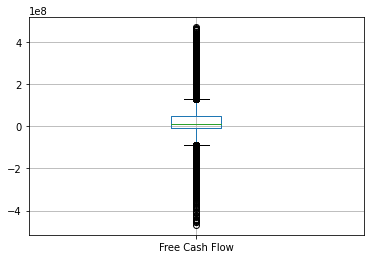

In [77]:
train_data.boxplot(column = "Free Cash Flow")

Ahora debo hacer el mismo procedimiento con la data de Testeo. En este caso, como la Data de Testeo es víctima de las decisiones tomadas en la data de entrenamiento. Se deben despejar todos los datos de la data de testeo que cumplan, con estar entre los valores del percentil 0.005 y el 0.995, pero OJO, estos valores corresponden a los de los percentiles de la data de Entrenamiento.

Debemos crear otra función `util`, que ahora reciba como inputs, la data de entrenamiento, la de testeo y una columna en particular.

In [78]:
def util2(train, test, col):
    lim_inf = train[col].quantile(0.005)
    lim_sup = train[col].quantile(0.995)
    cleaned_data = test.loc[(test[col] >= lim_inf) & (test[col] <= lim_sup)]
    return cleaned_data

for col in columnas_a_limpiar:    
    test_data = util2(train_data, test_data, col)

In [79]:
test_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
44         GERN  1.066000e+06          0.0009              0.0     1066000.0   
111        HOME  9.505280e+08          0.2415      643570000.0   306958000.0   
134        CDNA  7.656900e+07          0.5845       32987000.0    43582000.0   
167        ETSY  6.036930e+08          0.3682      190762000.0   412931000.0   
174        ENTG  1.550497e+09          0.1549      830666000.0   719831000.0   
...         ...           ...             ...              ...           ...   
4384       XBIT  0.000000e+00          0.0000              0.0           0.0   
4385       XELB  3.546600e+07          0.1186        2702000.0    32764000.0   
4388       YTEN  5.560000e+05         -0.4110              0.0      556000.0   
4389       ZKIN  5.488438e+07          0.2210       36593792.0    18290589.0   
4391       ZYME  5.301900e+07          0.0243              0.0    53019000.0   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
44      13432000.0    18707000.0          30833000.0       -29767000.0   
111            0.0   211057000.0         219597000.0        87361000.0   
134     14514000.0    43629000.0          58143000.0       -14561000.0   
167     97249000.0   240896000.0         338145000.0        74786000.0   
174    118456000.0   246534000.0         427142000.0       292689000.0   
...            ...           ...                 ...               ...   
4384    15725000.0     5269000.0          20994000.0       -20994000.0   
4385           0.0    24467000.0          28834000.0         3930000.0   
4388     4759000.0     5071000.0           9830000.0        -9274000.0   
4389     1652633.0     7020320.0           8672953.0         9617636.0   
4391    56684000.0    29457000.0          86146000.0       -33127000.0   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
44                 0.0          -27017000.0                 0.0   
111         21704000.0           65657000.0          33845000.0   
134          3701000.0          -48190000.0          -1434000.0   
167         22178000.0           55078000.0         -22413000.0   
174         34094000.0          254432000.0          13677000.0   
...                ...                  ...                 ...   
4384               0.0          -21138000.0                 0.0   
4385         1011000.0            2919000.0           1831000.0   
4388               0.0           -9170000.0                 0.0   
4389         1239170.0            8416324.0           1398210.0   
4391          166000.0          -34385000.0           2171000.0   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
44                                 0.0                            0.0   
111                                0.0                            0.0   
134                           -25000.0                            0.0   
167                                0.0                            0.0   
174                                0.0                            0.0   
...                                ...                            ...   
4384                               0.0                            0.0   
4385                               0.0                            0.0   
4388                               0.0                            0.0   
4389                           84943.0                            0.0   
4391                               0.0                            0.0   

       Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
44    -27017000.0                  0.0     -27017000.0 -0.15        -0.15   
111    31812000.0                  0.0      31812000.0  0.53         0.50   
134   -46756000.0                  0.0     -46756000.0 -1.31        -1.31   
167    77491000.0                  0.0      77491000.0  0.64         0.61   
174   240755000.0                  0.0     240755000.0  1.71         1.69   
...        

Nuevamente notamos que perdemos una buena cantidad de datos, pero ahora en el Set de Testeo. Lamentable, pero se logran resultados menos sesgados y más generalizables a la data del mundo real, ya que es más útil que nuestro modelo sirva para predecir las acciones comunes, que intente explicar a todaaas las acciones. 

Igual es importante tener en cuenta que si bien se pierden filas, igual se tiene una magnitud bastante grande de datos. 

### 5. Tratando Outliers (Round 2):

Ahora nos preocupamos de, los datos con media pequeña. La idea acá es desepejar los datos que sean como valores por acción, fracciones, o valores de ese tipo y tratar los outliers presentes en estas columnas. Recordemos que en la Misión 1, priceBookValueRatio también sufría de outliers. Si miramos un boxplot de algunas de estas variables lo podremos notar rápidamente.

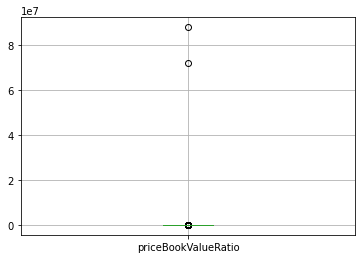

In [80]:
train_data.boxplot(column = "priceBookValueRatio")

La idea entonces es tratar también estas columnas, y librarnos de esos "puntos locos", que se pueden ver en el boxplot que se encuentra en el superior. Procedemos entonces a tratar las columnas de "media chica", que son parte de las 10 seleccionadas en el ejercicio. Se hace esto, dado que al resolver el conflicto, eliminando las observaciones mayores al percentil 0.999, para todas las con media menor a 1.000.000 se pierden muchísimas variables, quedando con solo 2851 observaciones para entrenar. Por esta razón, solo se resuelve este conflicto para las acciones interesantes según lo dicho en la misión 1.

Siguiendo la misma lógica que en la resolución de conflicto número 4, se resuelve este desafío.

In [81]:
columnas_a_limpiar2 = ['Return', 'Dividend per Share', 'debtEquityRatio', 'ROE', 'priceBookValueRatio']

In [82]:
train_data["Return"].quantile(0.999)

1605.7934401940117

In [83]:
def util3(data, col):
    lim_sup = data[col].quantile(0.999)
    cleaned_data = data.loc[(data[col] <= lim_sup)]
    return cleaned_data

for col in columnas_a_limpiar2:    
    train_data = util(train_data, col)

In [84]:
train_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
32           PBH  5.973810e+08         -0.0367     2.618300e+08   335551000.0   
35           SFM  2.967424e+09          0.2172     2.082221e+09   885203000.0   
42           GNC  2.655006e+09          0.0108     1.674766e+09   980240000.0   
45          TWNK  5.546950e+08          0.0521     3.207630e+08   233932000.0   
47          CHGG  3.048340e+08          0.1927     2.109850e+08    93849000.0   
...          ...           ...             ...              ...           ...   
17680       TSRI  6.257258e+07          0.0258     5.232652e+07    10246064.0   
17681       TZOO  1.065240e+08         -0.0677     1.290900e+07    93615000.0   
17682      USATP  1.040000e+08          0.0521     7.700000e+07    27000000.0   
17683       WSTG  1.605670e+08         -0.0246     1.334910e+08    27076000.0   
17684        WTT  4.607800e+07          0.4709     2.681700e+07    19261000.0   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
32              0.0   133449000.0         146935000.0       188616000.0   
35              0.0   677018000.0         685492000.0       199711000.0   
42              0.0   554882000.0         544942000.0       435298000.0   
45              0.0    90983000.0         114465000.0       119467000.0   
47       49386000.0   114152000.0         158983000.0       -65134000.0   
...             ...           ...                 ...               ...   
17680           0.0     9683601.0           9683601.0          562463.0   
17681     9224000.0    79846000.0          89070000.0         4545000.0   
17682           0.0    25000000.0          27000000.0               0.0   
17683           0.0    19263000.0          19263000.0         7813000.0   
17684     4395000.0    17987000.0          22382000.0        -3121000.0   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
32           68642000.0          101748000.0          29133000.0   
35           25063000.0          174106000.0          66414000.0   
42           46708000.0          392804000.0         136932000.0   
45           37447000.0           77197000.0                 0.0   
47             317000.0          -64572000.0            186000.0   
...                 ...                  ...                 ...   
17680               0.0             531189.0            263000.0   
17681               0.0            6656000.0           3126000.0   
17682         1000000.0           -2000000.0                 0.0   
17683         -699000.0            8553000.0           3491000.0   
17684          296000.0           -3246000.0           1247000.0   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
32                                  0.0                            0.0   
35                                  0.0                            0.0   
42                                  0.0                            0.0   
45                                  0.0                            0.0   
47                                  0.0                            0.0   
...                                 ...                            ...   
17680                           45778.0                            0.0   
17681                               0.0                     -1938000.0   
17682                               0.0                            0.0   
17683                               0.0                            0.0   
17684                               0.0                            0.0   

        Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
32      72615000.0                  0.0      72615000.0  1.41         1.39   
35     107692000.0                  0.0     107692000.0  0.72         0.70   
42     255872000.0                  0.0     255872000.0  2.83         2.81   
45      17400000.0                  0.0      77197000.0  0.63         0.62   
47     -64758000.0                  

Dado que solo trabajamos dos columnas, se nos van pocas observaciones de la base de datos de entrenamiento. Procedemos ahora a resolver el mismo conflicto, para estas mismas 5 variables, despejando todos los valores que estén sobre el percentil 0.999 de la data de Entrenamiento, de esa columna respectiva. 

Siguiendo la misma lógica que en la misión 4, al tratar la data de testeo se procede a resolver el ejercicio, para el cual es necesario definir una cuarta función `util4`.

In [85]:
def util4(train, test, col):
    lim_sup = train[col].quantile(0.995)
    cleaned_data = test.loc[(test[col] <= lim_sup)]
    return cleaned_data

for col in columnas_a_limpiar2:    
    test_data = util4(train_data, test_data, col)

In [86]:
test_data

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
44         GERN  1.066000e+06          0.0009              0.0     1066000.0   
111        HOME  9.505280e+08          0.2415      643570000.0   306958000.0   
134        CDNA  7.656900e+07          0.5845       32987000.0    43582000.0   
167        ETSY  6.036930e+08          0.3682      190762000.0   412931000.0   
174        ENTG  1.550497e+09          0.1549      830666000.0   719831000.0   
...         ...           ...             ...              ...           ...   
4381       WVFC  6.966000e+06          0.1192              0.0     6966000.0   
4382       WVVI  2.307974e+07          0.1068        8298240.0    14781499.0   
4385       XELB  3.546600e+07          0.1186        2702000.0    32764000.0   
4388       YTEN  5.560000e+05         -0.4110              0.0      556000.0   
4389       ZKIN  5.488438e+07          0.2210       36593792.0    18290589.0   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
44      13432000.0    18707000.0          30833000.0       -29767000.0   
111            0.0   211057000.0         219597000.0        87361000.0   
134     14514000.0    43629000.0          58143000.0       -14561000.0   
167     97249000.0   240896000.0         338145000.0        74786000.0   
174    118456000.0   246534000.0         427142000.0       292689000.0   
...            ...           ...                 ...               ...   
4381           0.0     2804000.0           3673000.0         3293000.0   
4382           0.0    10598784.0          10598784.0         4182715.0   
4385           0.0    24467000.0          28834000.0         3930000.0   
4388     4759000.0     5071000.0           9830000.0        -9274000.0   
4389     1652633.0     7020320.0           8672953.0         9617636.0   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
44                 0.0          -27017000.0                 0.0   
111         21704000.0           65657000.0          33845000.0   
134          3701000.0          -48190000.0          -1434000.0   
167         22178000.0           55078000.0         -22413000.0   
174         34094000.0          254432000.0          13677000.0   
...                ...                  ...                 ...   
4381               0.0            3253000.0           1128000.0   
4382          457689.0            3939586.0           1081006.0   
4385         1011000.0            2919000.0           1831000.0   
4388               0.0           -9170000.0                 0.0   
4389         1239170.0            8416324.0           1398210.0   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
44                                 0.0                            0.0   
111                                0.0                            0.0   
134                           -25000.0                            0.0   
167                                0.0                            0.0   
174                                0.0                            0.0   
...                                ...                            ...   
4381                               0.0                            0.0   
4382                               0.0                            0.0   
4385                               0.0                            0.0   
4388                               0.0                            0.0   
4389                           84943.0                            0.0   

       Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
44    -27017000.0                  0.0     -27017000.0 -0.15        -0.15   
111    31812000.0                  0.0      31812000.0  0.53         0.50   
134   -46756000.0                  0.0     -46756000.0 -1.31        -1.31   
167    77491000.0                  0.0      77491000.0  0.64         0.61   
174   240755000.0                  0.0     240755000.0  1.71         1.69   
...        

Nuevamente pierdo un poco más de observaciones...

**Comentarios Generales M2:** Fue interesante jugar con los datos, en esta etapa. Siento que la verdadera familiarización con la Base se logró acá y no en la Misión 1. Lamentablemente en la resolución de conflicto 4, se perdieron muchas observaciones del set de testeo y del set de Entrenamiento, sin embargo es importante despejar outliers disruptivos ya que sesgan bastante las estimaciones del modelo. En algún momento, se me pasó por la cabeza la idea de reemplazar la columna de la observación, que era outlier en vez de eliminar o *dropear* toda una fila, pero me pareció que esto sería una forma bastante grave de alterar la realidad que verá el modelo.

Pese a esto último, igual terminamos con un set de Entrenamiento bastante grande así que espero, que en esta misión no haya tomado los pasos equivocados, prefiriendo tener observaciones ordinarias pero en menor cantidad, en vez de tener más observaciones pero algunas muchas con alta probabilidad de sesgar nuestras futuras estimaciones. Esto último, es un fiel reflejo del famoso *trade-off* entre Cantidad y Calidad. 

Antes de pasar a la siguiente misión *reseteamos* los índices de las data frames de testeo y de entrenamiento, así nos quedan en ambas tablas los índices de cada observación ordenados.

In [87]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

## Misión 3: Visualización:

En esta misión se visualizarán los datos, de manera original. Si bien, a lo largo del trabajo hasta ahora, se hicieron múltiples visualizaciones (tablas dinámicas, histogramas y cajas y bigote), estas estaban bastante sesgadas ya que sufrían de sesgos por la presencia de outliers, valores vacíos, etc.

### Análisis de las Variables Dependientes:

Partamos viendo como nos quedan ahora nuestra futura variable dependiente **`Return`**, en términos de distribución.

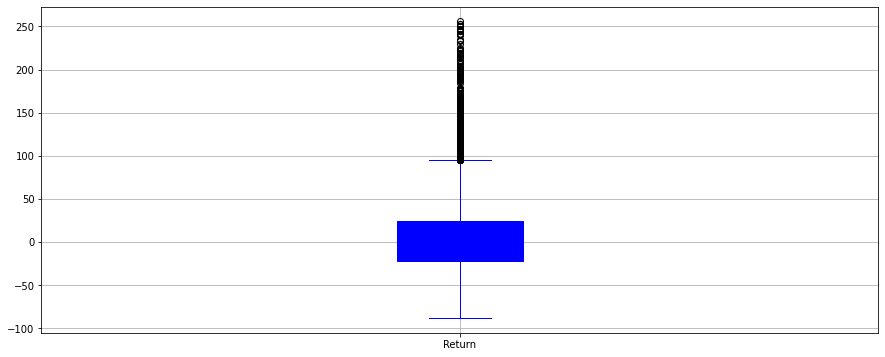

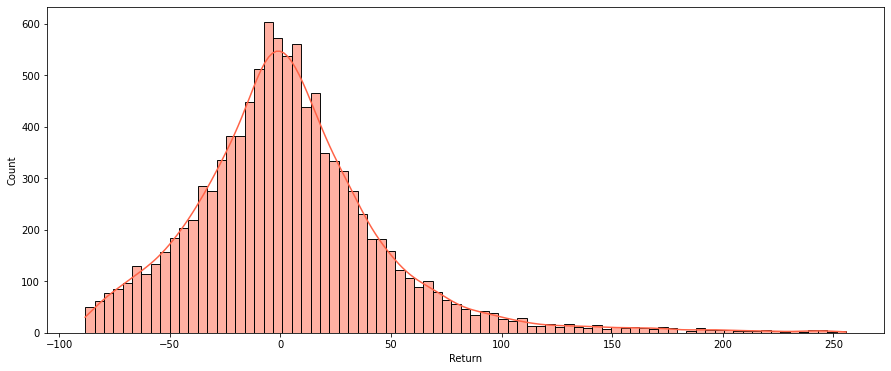

In [88]:
train_data.boxplot(column='Return', color = "blue", patch_artist = "True", figsize = (15, 6))
plt.show()


plt.figure(figsize = (15,6))
sns.histplot(data=train_data, x="Return", kde=True, color = "tomato")
plt.show()

Notamos que esta variable ahora tiene un comportamiento bastante armónico, en términos de distribución. Si bien, aún existen outliers que se escapan de los bigotes, estos son bastante pequeños, ahora podemos ver una caja claramente y también podemos ver un histograma distribuido en un plano sin ajustes de escala (como el que veíamos en la misión 1). La distribución de esta variable podría ser una Distribución Weibull (no se mucho de estadística, pero en Google se veía parecida : ) ).

Veamos ahora como es el retorno por Sector. Esto lo podemos ver de dos formas distintas, la primera es a través de diagramas del tipo caja-bigote que muestren la distribución del retorno por cada sector. Pero antes veamos las medias de los retornos, por cada sector a través de una Tabla Dinámica, ordenada de mayor a menor retorno. Luego se puede ver el caja bigote del retorno por sector.

In [89]:
dinamica = train_data.pivot_table("Return", index = "Sector")

rank = dinamica.reindex(dinamica['Return'].sort_values(ascending=False).index)

display(rank)

Return
Sector                          
Utilities               9.891265
Technology              8.216201
Financial Services      7.558505
Consumer Defensive      6.985376
Real Estate             5.269922
Basic Materials         4.328962
Communication Services  3.463996
Industrials             3.184252
Consumer Cyclical       2.515606
Healthcare             -0.968487
Energy                 -9.995630

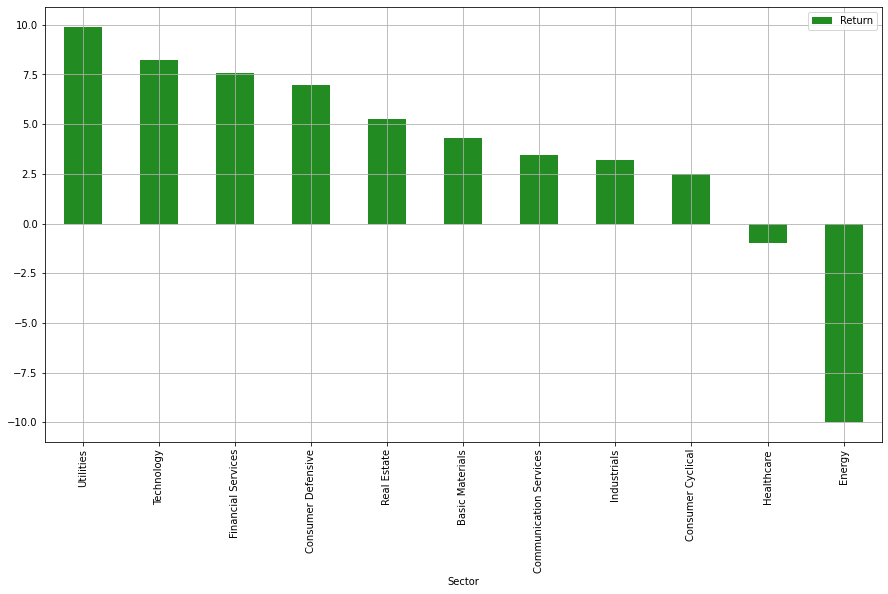

In [90]:
rank.plot(kind="bar", color = "forestgreen", grid = True, figsize = (15, 8))
plt.show()

A partir solo de este gráfico, claramente NO recomendaríamos invertir en el sector Energía, los retornos promedio son NEGATIVOS! Si recomendamos el sector de Tecnologías y de Utilities.

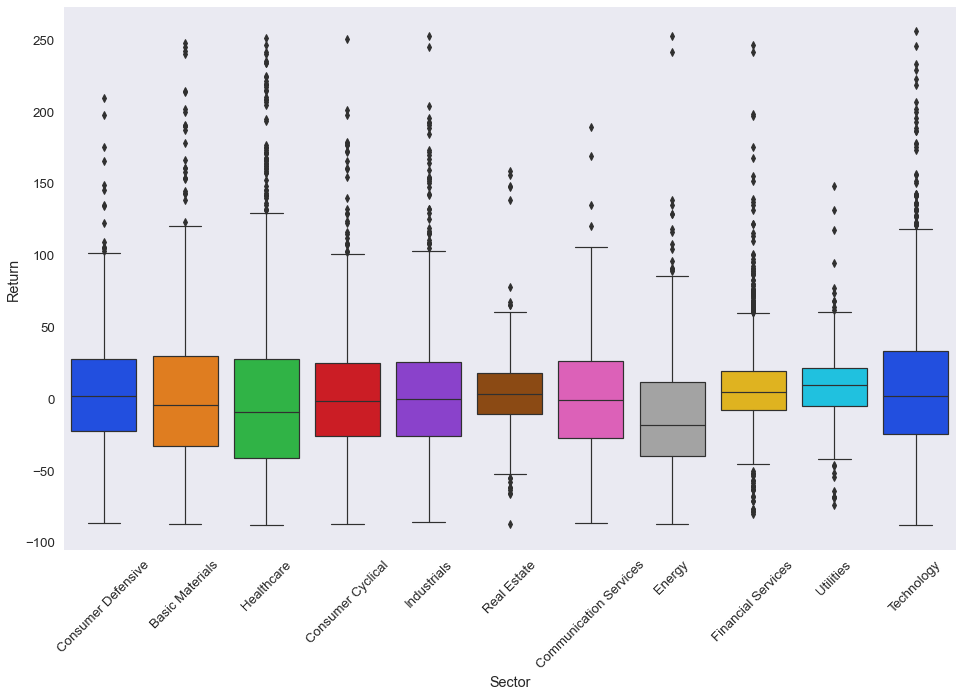

In [91]:
plt.figure(figsize = (16,10))
sns.set_style('dark')
sns.set_palette('bright', 100)
sns.set_context('paper', font_scale = 1.5)
sns.boxplot(x = 'Sector', y = 'Return', data = train_data)
plt.xticks(rotation=45)
plt.show()

Los cajas y bigote muestran, que distintos sectores tienen distintas distribuciones. En ese sentido, ciertos sectores aseguran mayores o menores retornos. También los sectores con cajas que están por completo más arriba que otros sectores, es más probable obtener retornos invirtiendo en ellos. Por último, cajas más largas, significa en cierto sentido, que ese sector presenta más volatilidad, y por ende es más riesgoso. El sector de Salud presenta, esta característica. 

Veamos que pasa cuando separamos las columnas, por sector y por **`Class`**. En teoría Class muestra, las acciones convenientes, veamos que pasa.

In [92]:
tabla2 = train_data.pivot_table("Return", index = "Sector", columns = "Class")
display(tabla2)

Class                           0          1
Sector                                      
Basic Materials        -32.921512  48.588236
Communication Services -31.565217  39.154138
Consumer Cyclical      -28.260568  35.726052
Consumer Defensive     -25.678334  37.315963
Energy                 -35.272566  39.142733
Financial Services     -13.660460  22.331202
Healthcare             -38.312427  51.603078
Industrials            -29.547475  36.293289
Real Estate            -17.111052  23.045425
Technology             -29.668052  42.320818
Utilities              -21.574908  26.999087

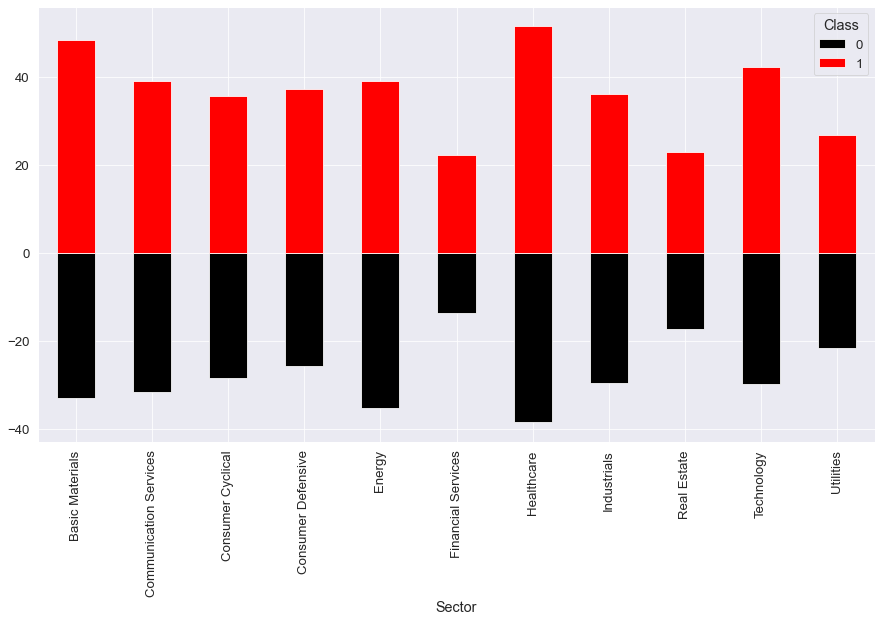

In [93]:
tabla2.plot(kind= "bar", color = ["black", "red"], figsize = (15,8), stacked = True, grid = True)
plt.show()

Claramente, la feature `Class`, contempla el retorno en su criterio para seleccionar que acción es más o menos conveniente. Esto se nota en las barras negras, negativas y las rojas positivas. Es decir, las acciones de Class con valor 1, tienen retornos promedio positivo en todos los sectores. Lo contrario ocurre para las acciones de Class 0 para todos los sectores.

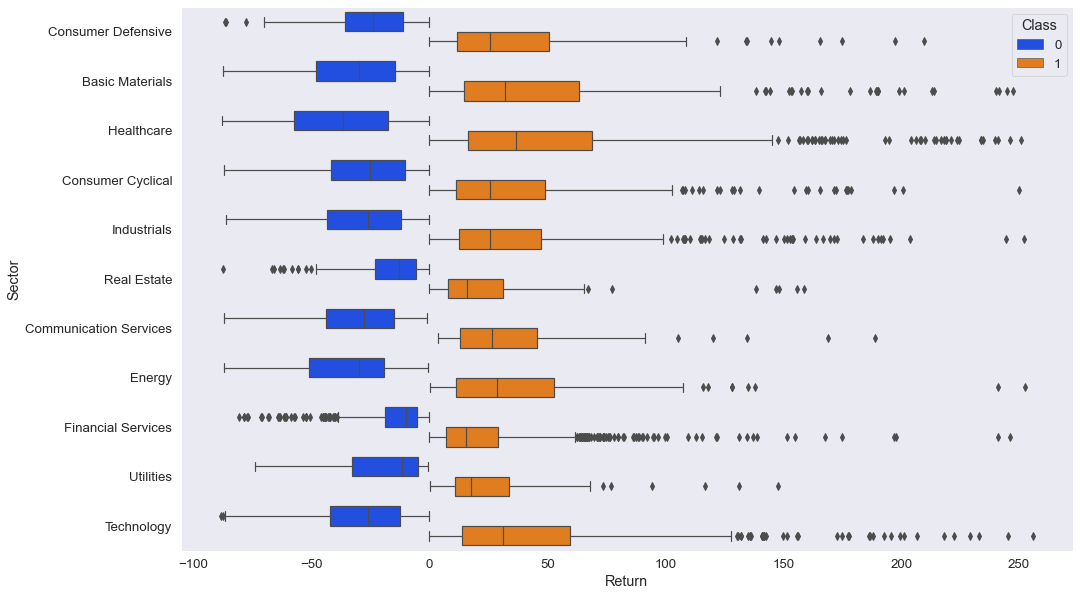

In [94]:
plt.figure(figsize = (16,10))
sns.set_style('dark')
sns.set_palette('bright', 100)
sns.set_context('paper', font_scale = 1.5)
sns.boxplot(x = 'Return', y = 'Sector', data = train_data, hue = "Class")
plt.show()

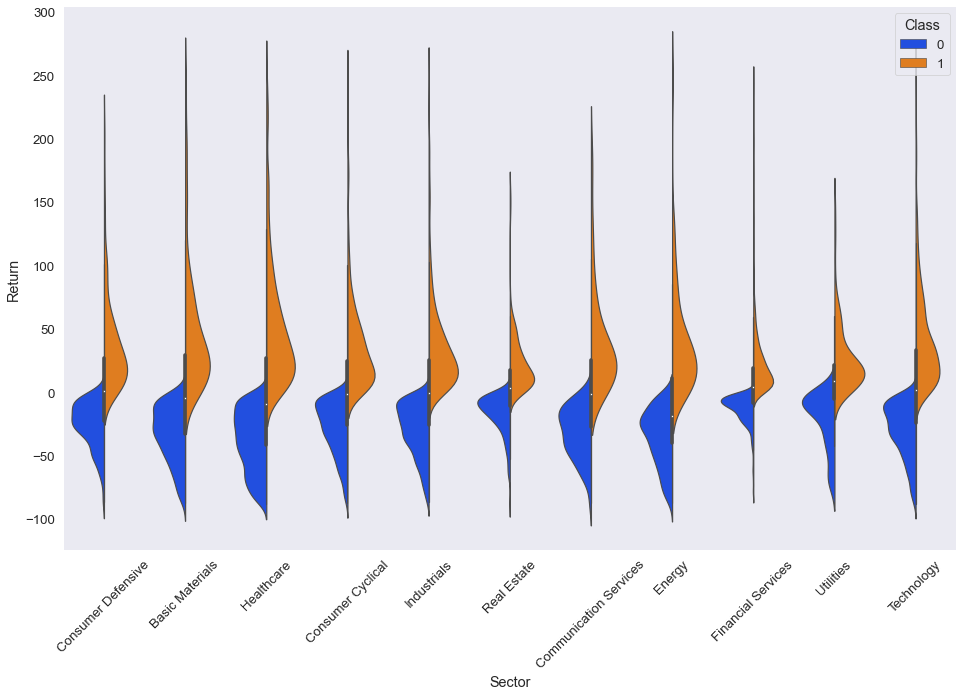

In [95]:
plt.figure(figsize = (16,10))
sns.set_style('dark')
sns.set_palette('bright', 100)
sns.set_context('paper', font_scale = 1.5)
sns.violinplot(x = 'Sector', y = 'Return', data = train_data, hue = "Class", split = 'True')
plt.xticks(rotation=45)
plt.show()

Es interesante notar como los distintos sectores tienen distintas distribuciones de retorno. Algunos sectores presentan cajas o distribuciones más extendidas y otros sectores cajas o distribuciones menos extendidas. Como se dijo previamente sectores con cajas más largas, son a priori sectores con más volatilidad, como se dijo previamente.

#### Reducción de Dimensiones:

En el siguiente cuadro se tratará de construir a través de un análisis de componentes principales una representación de las variables según su valor de `Class`. Para implementar este código me basé fuertemente en lo explicado en este link: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

Primero, debo definir las variables X o features, para ello voy a aprovechar de eliminar la columna del nombre de las acciones como nos sugirió el profesor Hans Löbel.  

In [96]:
train_data.drop("Unnamed: 0", axis = 1, inplace = True )
test_data.drop("Unnamed: 0", axis = 1, inplace = True )

In [97]:
features = []

for col in train_data_num.columns:
    if col not in ["Return", "Class"]:
        features.append(col)
    

In [98]:
from sklearn.preprocessing import StandardScaler

x = train_data.loc[:, features].values
y = train_data.loc[:,['Class']].values
x = StandardScaler().fit_transform(x)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [100]:
finalDf = pd.concat([principalDf, train_data[['Class']]], axis = 1)

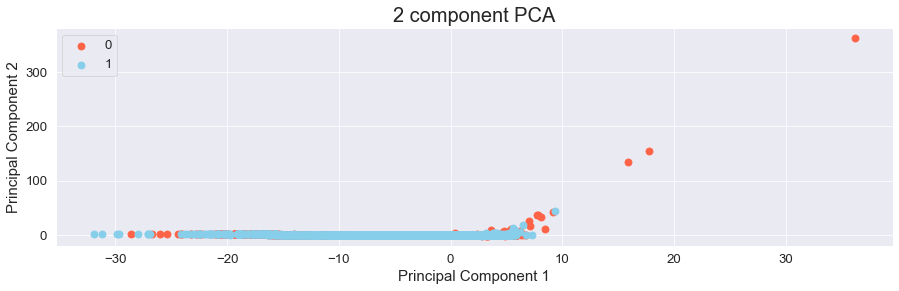

In [101]:
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['tomato','skyblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Notamos que vía este análisis de Componentes Principales, que separa TODAS las columnas en estos dos ejes, no se puede identificar claramente que observaciones perteneces a cada valor de `Class`, 0 o 1. Esto es señal de que el PCA no salió bien, probablemente esto ocurre por el exceso de features que se utiliza, que impide hacer una reducción de dimensiones que permita identificar cada clase.

Veamos que pasa si tratamos de hacer lo mismo, pero ahora en vez de usar todas las Features de la Base de Datos usamos solo las 8 Features posibles de las 10 que elegimos en la Misión 1.

In [102]:
features2 = ["Free Cash Flow",  "Goodwill and Intangible Assets", "Dividend per Share", \
             "debtEquityRatio", "Market Cap", "Class", "ROE", "priceBookValueRatio"]

In [103]:
x = train_data.loc[:, features2].values
y = train_data.loc[:,['Class']].values
x = StandardScaler().fit_transform(x)

In [104]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [105]:
finalDf = pd.concat([principalDf, train_data[['Class']]], axis = 1)

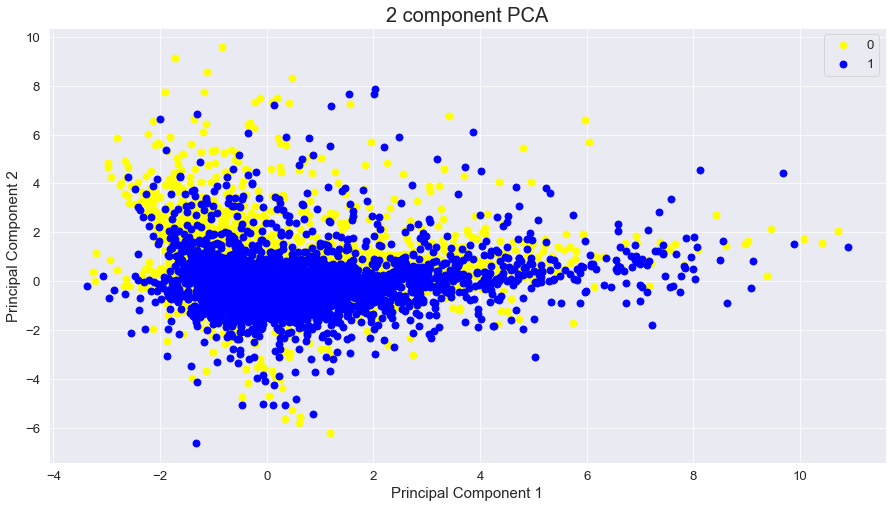

In [106]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['yellow','blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Notamos que con los Features que le dimos, no es claro distinguir entre las observaciones o acciones de buena calidad o recomendables (Class = 1) de las de mala calidad o *no recomendables* (Class = 0).

Veamos que logramos con un análisis del tipo t-SNE. Para hacer este desarrollo, utilicé lo sacado del link que usé para hacer el PCA y también lo visto en la ayudantía 3 con Pablo Seisdedos.

In [107]:
x = train_data.loc[:, features2].values
y = train_data.loc[:,['Class']].values
x = StandardScaler().fit_transform(x)

TSNE = manifold.TSNE(n_components=2)

In [110]:
projected = TSNE.fit_transform(x)

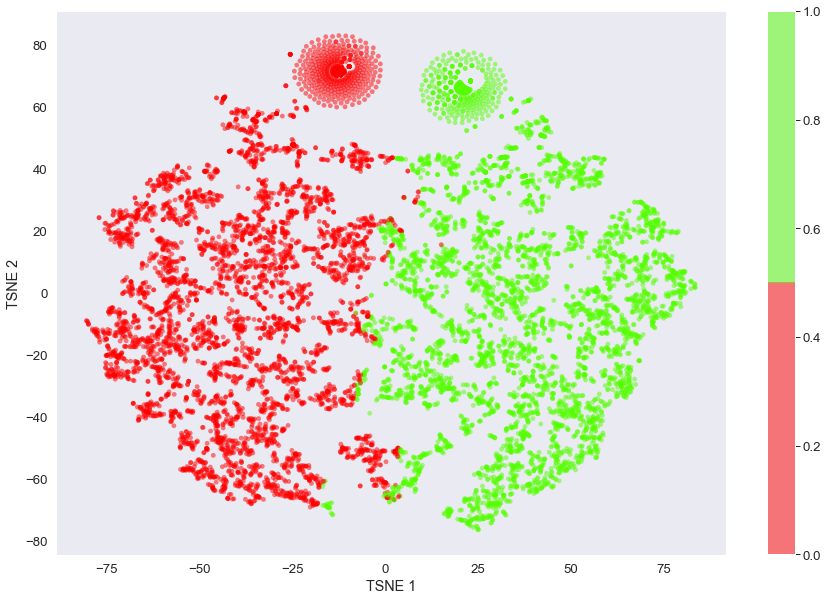

In [111]:
plt.figure(figsize=(15,10))
plt.scatter(projected[:, 0], projected[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('prism', 2))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar()
plt.show()

Notamos que con esta estrategia se pueden identificar, mejor las acciones. Podemos identificar de mejor manera los dos grupos de acciones los de `Class` igual a 0 (rojos) y los de `Class` igual a 1 (verdes).

Es muy interesante ver como se generan dos puntos de acumulación o **clusters** (los circulos verde y rojos) en la parte del medio y arriba del cuadro. Estos representan puntos de acumulación de las observaciones que son de Class cero o uno.

### Análisis de Features:

En esta sección, dadas todas las features que tenemos, no se hará muchas visualizaciones. Pero sí se harán una serie de visualizaciones interesantes, que permitirán familiarizarnos aún más con los datos.

En primer lugar vemos una distribución de las observaciones, en la data de entrenamiento según sector. Para ello me pareció útil, representar este conteo en un gráfico de torta como el que se ve más abajo. Los 3 sectores con más acciones como representantes son:
1. Servicios Financieros.
2. Empresas del Cuidado de la Salud.
3. Empresas de Tecnología o Tech-Companies.

In [112]:
tablon = train_data["Sector"].value_counts()
sizes = tablon.values

In [113]:
tablon.index

Index(['Financial Services', 'Healthcare', 'Technology', 'Industrials',
       'Consumer Cyclical', 'Basic Materials', 'Real Estate',
       'Consumer Defensive', 'Energy', 'Utilities', 'Communication Services'],
      dtype='object')

In [114]:
labels = 'Financial Services', 'Healthcare', 'Technology', 'Industrials', 'Consumer Cyclical', 'Basic Materials', \
         'Real Estate', 'Consumer Defensive', 'Energy', 'Utilities', 'Communication Services'

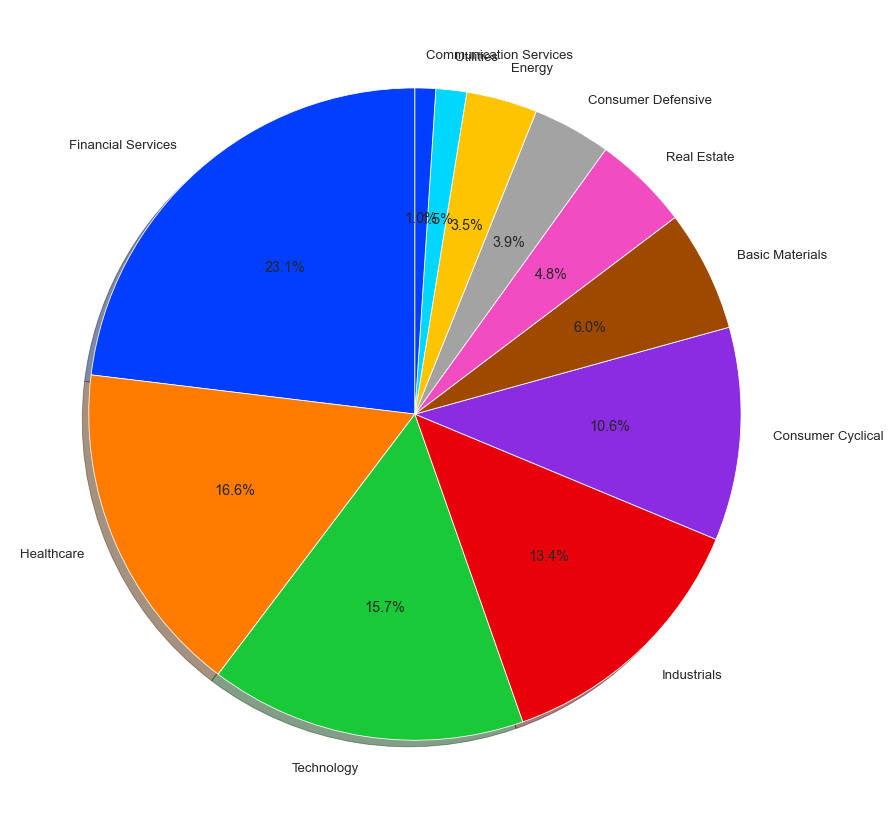

In [115]:
plt.figure(figsize=(15,15))
plt.pie(sizes, autopct='%1.1f%%', labels = labels,
        shadow=True, startangle=90)

plt.show()

Además puede ser interesante ver la distribución de algunas de las demás variables dependientes después de la Misión 2.

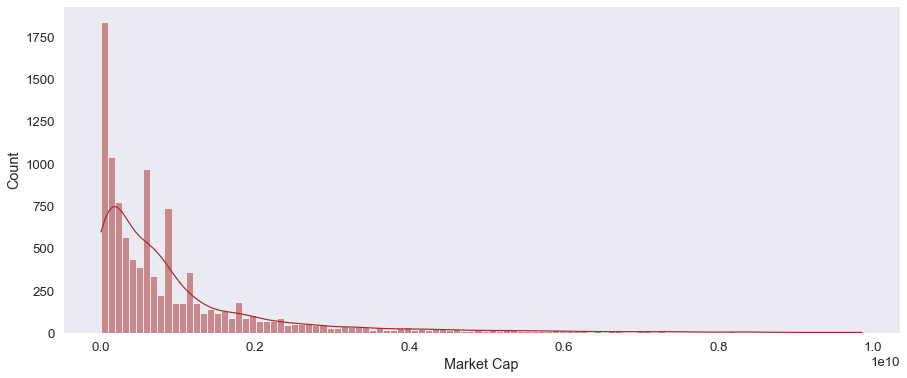

In [116]:
plt.figure(figsize = (15,6))
sns.histplot(data=train_data, x="Market Cap", kde=True, color = "brown")
plt.show()

La distribución de esta variable se asemeja bastante a una Chi-Cuadrado. 

Veamos la distribución de más variables, post Depuración. En el siguiente cuadro veremos que pasa con la columna `priceBookValueRatio`.  

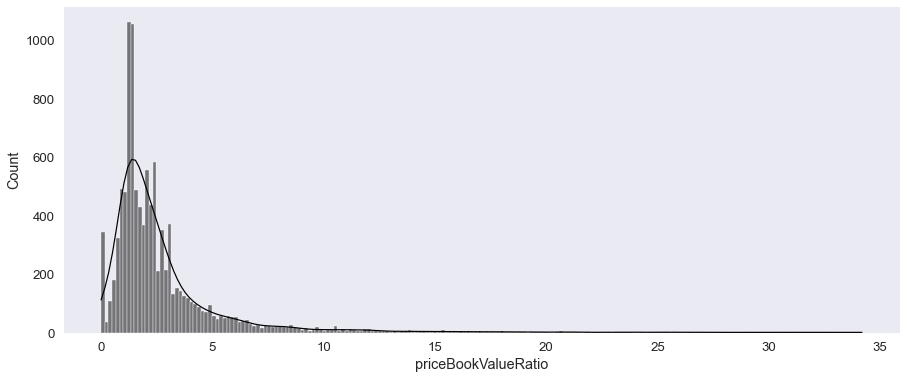

In [117]:
plt.figure(figsize = (15,6))
sns.histplot(data=train_data, x="priceBookValueRatio", kde=True, color = "black")
plt.show()

Viendo esta gráfica notamos que la variable `priceBookValueRatio` distribuye Fisher (F). Sin la línea de kde, me fue difícil predecir como era la distribución de esta variable. Este atributo de la librería `seaborn`, ayuda mucho en ese sentido.

Notamos que `priceBookValueRatio` distribuye prácticamente log-normal o también chi-cuadrado. Es agradable ver gráficos más anchos, que los que veíamos en la Misión 1. Esto último se da, por la gran pega que implicó la Misión 2.

Por último analizamos la variable `ROE`.

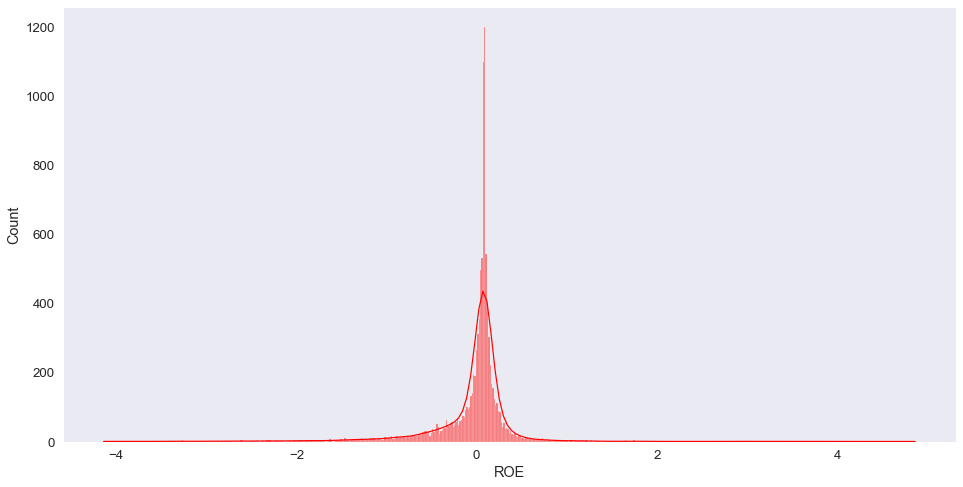

In [118]:
plt.figure(figsize = (16,8))
sns.histplot(data=train_data, x="ROE", kde=True, color = "red")
plt.show()

Notamos que esta variable distribuye bastante parecido a una distribución normal, que tiene una desviación estándar bastante baja. La media y moda, se centra en el cero y la frecuencia está más acumulada hacia el lado negativo, es decir, que hay más observaciones con `ROE` negativo.

Si bien podría hacer muchísimo análisis de los distintos features, me pareció interesante hacer el análisis de las distribuciones de distintas de estas, ya que en parte estas determinan la futura convergencia y la velocidad de esta en su camino al óptimo (es decir, hacia los parámetros que minimizan la función de costo).

### Análisis de Correlaciones:

En los siguientes cuadros se mostrará una visualización interesante de la correlación entre distintos pares de. variables. Partamos por la correlación entre la razón `EBITDA` y `Return`. Veamos que pasa:

<Figure size 1152x1152 with 0 Axes>

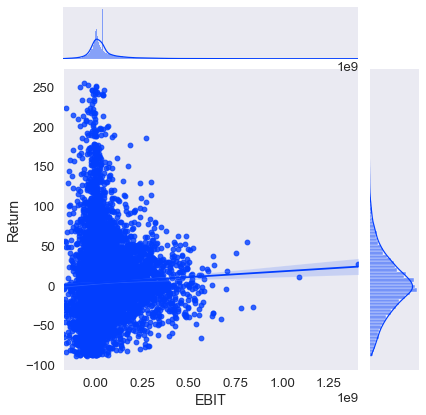

In [119]:
plt.figure(figsize = (16,16))
sns.set_style('dark')
sns.set_palette('bright', 100)
sns.set_context('paper', font_scale = 1.5)
sns.jointplot(x = 'EBIT', y = 'Return', data = train_data, kind = 'reg' )
plt.show()

Notamos que hay una correlación positiva entre ambas variables. Notar también que en el *eje X de arriba*, se muestra la distribución de la variable `EBIT` y en el *eje y de la derecha* se muestra la dsitribución de la variable `Return`.

Como he podido aprender en mis ramos de Finanzas, un mayor `EBIT` debiera ir acompañado de un mayor `Free Cash Flow`. Veamos que pasa:

<Figure size 1152x1152 with 0 Axes>

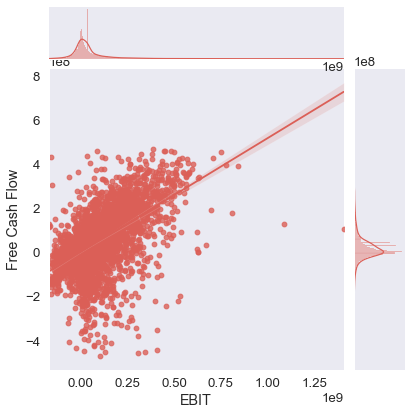

In [120]:
plt.figure(figsize = (16,16))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.jointplot(x = 'EBIT', y = 'Free Cash Flow', data = train_data, kind = 'reg' )
plt.show()

Claramente existe la relación positiva que habíamos predicho previamente. Esto sugiere que efectivamente un mayor `EBIT` esta correlacionado con un mayor `Free Cash Flow`, que según nuestra teoría se debiera dar por la relación lineal que tienen ambas variables.

Ahora hagamos un análisis, de la relación entre inversiones y el nivel de deuda de una empresa. Veamos si más inversión esta correlacionado con un mayor endeudamiento (`Total debt`).

<Figure size 1152x1152 with 0 Axes>

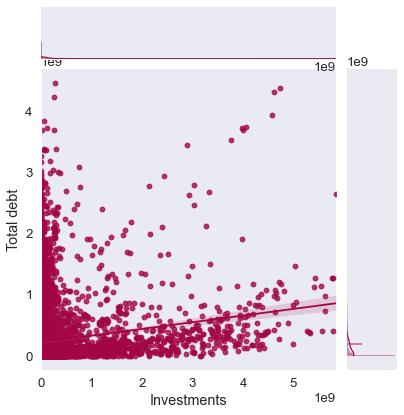

In [121]:
plt.figure(figsize = (16,16))
sns.set_style('dark')
sns.set_palette('Spectral', 100)
sns.set_context('paper', font_scale = 1.5)
sns.jointplot(x = 'Investments', y = 'Total debt', data = train_data, kind = 'reg' )
plt.show()

**Comentarios Generales Misión 3:**

Me encantó esta misión, lo pasé muy bien haciéndola. Ahora si que me conozco las bases de datos perfectamente. Siempre, me ha gustado mucho poder visualizar bien lo que uno hace, y que mejor que hacer visualizaciones gráficas de ello para realizarlo. Intenté, ser preciso pero siento que cada una de las gráficas es importante. Espero no haber sido latero.

## Misión 4: Entrenamientos de Modelos Parte 1.

Como vimos en clases antes de partir entrenando los modelos es imporante extraer una porción de la data de entrenamiento para usarla como data de validación. La idea de esto, es tener una porción de los datos, que no se utilizará para testear la generalización del modelo ni para entrenar. 

Con el set de validación, se pone a prueba la generalización de los distintos modelos a crear. Sería bastante mal hecho, si creyera que un modelo con un alto porcentaje de aciertos en la data de entrenamiento, es el mejor. Esto porque es posible que tengamos modelos, que acierta muchísimo en la data de entrenamiento (casi 100%) pero es probable que se esté *pecando* de **Overfitting**, es decir que el modelo no se puede extrapolar para predecir data distinta a la de entrenamiento.

Por otro lado, tampoco sería correcto (pero no tan grave como lo primero) seleccionar el mejor modelo, a partir de sus aciertos en la data de testeo. Esto porque, el objetivo de ver que tanto acierta el modelo en la data de testeo es ver que tanto puede generalizar el modelo con data completamente nueva, y no si es mejor o peor que los otros modelos. Por ello, hay que ser riguroso y dividir de forma aleatoria la data de entrenamiento en dos para tener un nuevo set que se llamará **val**. 

Antes de hacer la división conviene primero convertir nuestra variable `Sector`, la única variable cualitativa que nos interesa, en una variable cuantitativa. Aprovechamos de hacer lo mismo para la data de Testeo. Partimos por eso entonces:

In [122]:
le = LabelEncoder()
train_data['Sector'] = le.fit_transform(train_data['Sector'])

In [123]:
le2 = LabelEncoder()
test_data['Sector'] = le2.fit_transform(test_data['Sector'])

Revisamos que haya cambiado nuestra variable `Sector` en ambos sets, como se ve más abajo estamos OK.

In [124]:
train_data['Sector'].value_counts()

5     2412
6     1736
9     1638
7     1396
2     1104
0      628
8      497
3      405
4      368
10     159
1      107
Name: Sector, dtype: int64

In [125]:
test_data['Sector'].value_counts()

6     298
9     292
5     290
7     262
2     214
0     117
3      87
8      74
4      67
10     23
1      16
Name: Sector, dtype: int64

Ahora procedemos a dividir nuestra data de entrenamiento en 2. Para quedar con nombres más agradables de programar, ahora tendremos 3 sets de data, con los respectivos nombres:

1. `train`
2. `val`
3. `test`

El primero, corresponde a un 90% del set de entrenamiento que tenemos hasta el momento `train_data`. El segundo corresponde a un 20% del set de entrenamiento que tenemos hasta el momento `train_data`. El último, es el mismo set de testeo que tenemos hasta este momento, solo que le cambiamos el nombre para simplificar el código futuro.

In [126]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_data, test_size=0.2)
test = test_data

In [127]:
train.shape

(8360, 224)

In [128]:
val.shape

(2090, 224)

In [129]:
test.shape

(1740, 224)

Notamos que efectivamente se hizo la división en las proporciones pedidas. Además esta división se realizó de manera aleatoria, por lo que no tendremos una data con datos característicos de un año nomas.

Antes de partir modelando aprovechamos de *resetear* el índice de los dos primeros sets `train` y `val`.

In [130]:
train = train.reset_index(drop=True)

In [131]:
val = val.reset_index(drop=True)

## Modelación:

Para modelar con Clasificación debemos definir nuestros sets X e Y, para cada uno de los sets de Data que armamos justo antes. Por lo que entendí en la Lectura del Enunciado, el objetivo de esta misión más que nada es utilizar distintos modelos, por lo que se usarán para predecir a `Class` todas las demás variables de las diez seleccionadas en la misión 1 y solo variará el modelo utilizado.

Cada modelo se entrenará con el set de entrenamiento con las 10 features seleccionadas en la misión 1. Luego se evaluará el rendimiento de cada uno de estos modelos en la data de validación y se seleccionará al que tenga el mayor rendimiento en la data de valiación (`val`), para luego testearlo en el set de `test`.

Se usarán los siguientes modelos:
1. KNN Neighbours
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine
5. Red Neuronal (MLP)
6. Regresión Logística (usando Sigmoid Function).

Partamos entonces, primero hay que definir la matriz X de la data de entrenamiento, de la de validación y de la de testeo. Lo mismo con la variable y.

In [132]:
ten = ["Free Cash Flow", 'Goodwill and Intangible Assets', 'debtEquityRatio', \
                'Market Cap', 'ROE', 'priceBookValueRatio', 'Sector', 'Dividend per Share']

X_train = train[ten]

In [133]:
y_train = train['Class']

In [134]:
X_val = val[ten]

In [135]:
y_val = val['Class']

In [136]:
X_test = test[ten]

In [137]:
y_test = test['Class']

Habiendo ya creado las distintas matrices X necesarias, así como los vectores y, podemos proceder a trabajar con los modelos.


#### 1. KNN Neighbours:

In [138]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predicted = knn.predict(X_val)

Accuracy: 0.5780475502670976
Confusion matrix:


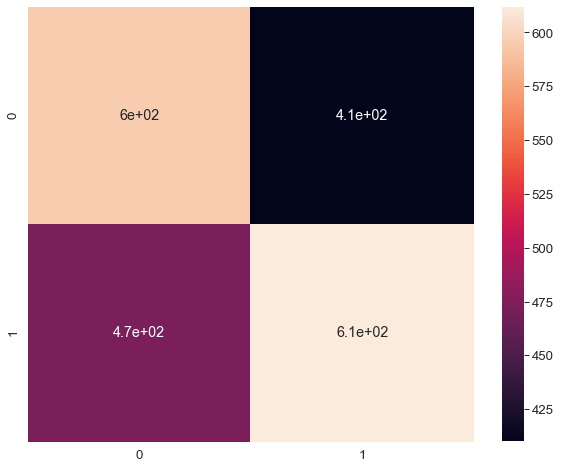

In [139]:
print("Accuracy: %s" % metrics.balanced_accuracy_score(y_val, predicted))
print("Confusion matrix:")
plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
plt.show()

El rendimiento de este clasificador de KNN Neighbours es de 59%. Como se ve en el mapa de calor, si bien hay muchas a las cuales se le achunta, hay muchísimas observaciones, a las que no lo estamos logrando *achuntar*, esperamos encontrar mejoras en los siguientes modelos.

#### 2. Decision Tree Classifier:

In [144]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=100)
tree.fit(X_train, y_train)
predicted = tree.predict(X_val)

Accuracy: 0.6248803827751196
Confusion matrix:


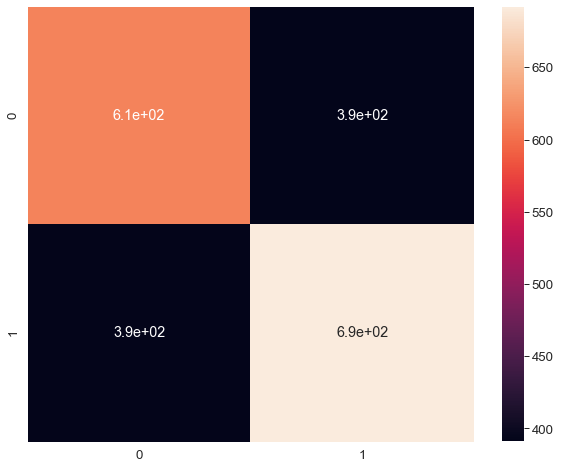

In [145]:
print("Accuracy: %s" % metrics.accuracy_score(y_val, predicted))
print("Confusion matrix:")
plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
plt.show()

Mejoramos claramente el nivel de precisión, ahora alcanza un nivel de 62,4%. Por ahora es preferible un Árbol de Decisión que un modelo del tipo KNN Neighbours. Debiera mejorar aún más la capacidad de achuntar a la data de validación, con los nuevos modelos a utilizar.

#### 3. Random Forest Classifier:

Este modelo debiera si o sí, tener una mejor precisión que los otros modelos ya utilizados. Esto porque en general la precisión mejora, cuando se pasa de un Árbol de Decisión a un Random Forest, ya que en cierto sentido un modelo de Random Forest es como el promedio de resultados de múltiples árboles de decisión.

In [158]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100) #numero de arboles
forest.fit(X_train, y_train)
predicted = forest.predict(X_val)

Accuracy: 0.6602870813397129
Confusion matrix:


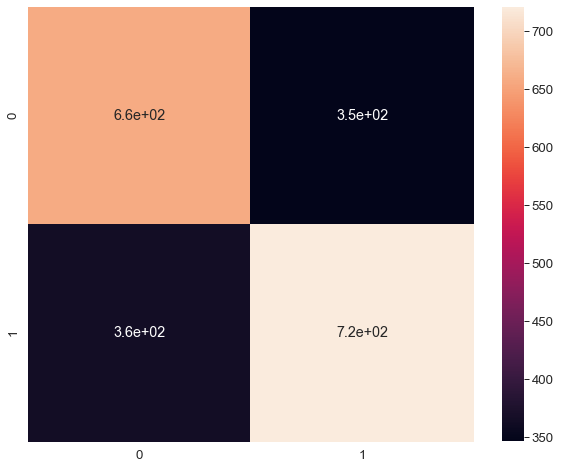

In [159]:
print("Accuracy: %s" % metrics.accuracy_score(y_val, predicted))
print("Confusion matrix:")

plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
plt.show()

Efectivamente mejoró la precisión, este modelo de Random Forest Classifier con 10 árboles, entrega un nivel de aciertos de la data de validación de 66,02%. Por ahora, este es nuestro modelo preferido.

**4.1 Support Vector Machine (kernel = linear):**

Por lo que revisé en los libros y en internet, un modelo de SVM varía mucho según el kernel que se utilice, por ello estudiaremos la efectividad de este modelo con sus tres kernels posibles.

In [160]:
from sklearn.svm import SVC

In [161]:
#svm = SVC(kernel='linear')
#svm.fit(X_train, y_train)
#predicted = svm.predict(X_val)

In [162]:
#Medidas de rendimiento
#print("Accuracy: %s" % metrics.accuracy_score(y_test, predicted))
#print("Balanced accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))
#print("Confusion matrix:")
#plt.figure(figsize = (10,8))
#sns.set_style('dark')
#sns.set_palette('hls', 100)
#sns.set_context('paper', font_scale = 1.5)
#sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
#plt.show()

Lamentablemente este modelo no logró correrse en mi computador... Esperé mucho rato y nunca se terminó de ejecutar. Quizás en otro computador podría ver como se comporta el SVM con kernel lineal.

**4.2 Support Vector Machine (kernel = poly):**

In [163]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
predicted = svm.predict(X_val)

Accuracy: 0.5186602870813397
Balanced accuracy: 0.4995758534516358
Confusion matrix:


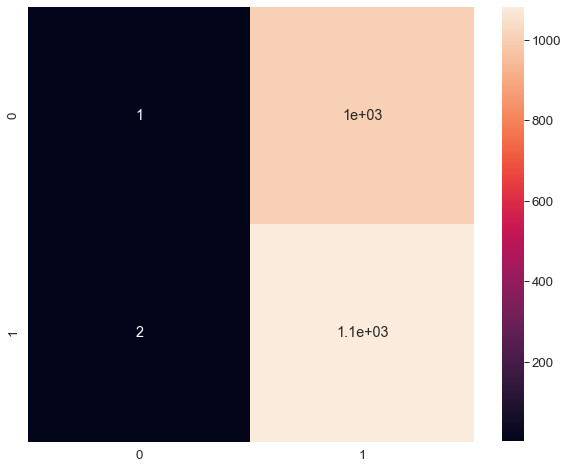

In [164]:
#Medidas de rendimiento
print("Accuracy: %s" % metrics.accuracy_score(y_val, predicted))
print("Balanced accuracy: %s" % metrics.balanced_accuracy_score(y_val, predicted))
print("Confusion matrix:")
plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
plt.show()

Este modelo tiene una capacidad de acierto relativamente baja, en comparación a los otros modelos vistos anteriormente. Tanto el *achunte* normal como el balanceado, con suerte superan el 50% (accuracy de 51,8%). Es interesante además notar que su capacidad de predecir cuando una acción es de la clase 0 es bastante nula, mientras que el modelo sin importar los features de la observación que ve, predice que esta es de Clase 1.

Dada la baja accuracy, casi que es preferible lanzar una moneda, que usar este modelo para predecir la Clase de la acción... Es posible, que el modelo no sea bien usado en este caso o que haya un problema en los features usados, que impiden calibrar y llevar a cabo un buen modelo.

**4.3 Support Vector Machine (kernel = rbf):**

In [165]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
predicted = svm.predict(X_val)

Accuracy: 0.5047846889952153
Balanced accuracy: 0.5159616663227641
Confusion matrix:


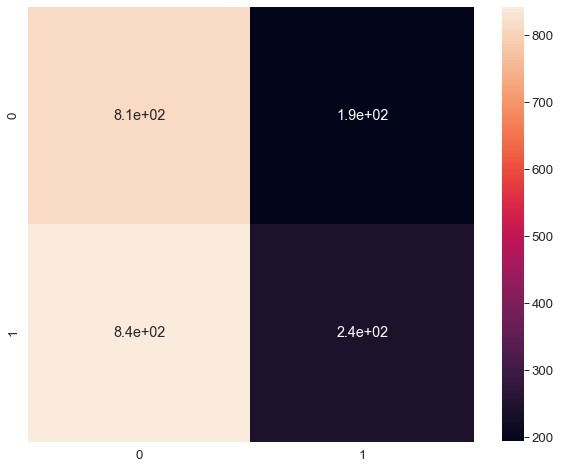

In [166]:
#Medidas de rendimiento
print("Accuracy: %s" % metrics.accuracy_score(y_val, predicted))
print("Balanced accuracy: %s" % metrics.balanced_accuracy_score(y_val, predicted))
print("Confusion matrix:")
plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
plt.show()

Este modelo de SVM con kernel `rbf`, no mejora en comparación al otro SVM con kernel del tipo `poly` este igual tiene un accuracy bastante reducido. Este caso es más preferible lanzar una moneda, que creer en nuestro modelo, que el caso anterior. Aún preferimos el Clasificador de Random Forest.

#### 5. Red Neuronal:

In [167]:
from sklearn.neural_network import MLPClassifier

In [168]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000) # 10
mlp.fit(X_train, y_train)
predicted = mlp.predict(X_val)

Accuracy: 0.5545454545454546
Confusion matrix:


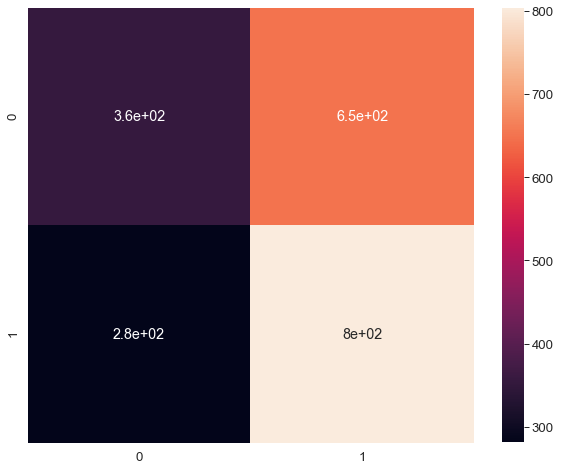

In [169]:
#Medidas de rendimiento
print("Accuracy: %s" % metrics.accuracy_score(y_val, predicted))
print("Confusion matrix:")
plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predicted), annot=True)
plt.show()

Este modelo de Red Neuronal (MLP) con tamaño 100 para las Hidden Layers, tampoco logra superar al Random Forest. Tiene una capacidad de acierto que supera el 50%, alcanzando un valor de 54%, pero no por mucho. 

Este modelo, no repele una clase en particular (como pasaba con los SVM con Kernel `poly` con la clase 0), sino que este modelo predice que las acciones son de clase cero, cuando lo son y cuando no lo son. Y también predice que acciones son de la clase 1, cuando son y también cuando no lo son.

#### 6. Regresión Logística:


In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, predictions)    

Accuracy: 0.5674641148325359
Confusion matrix:


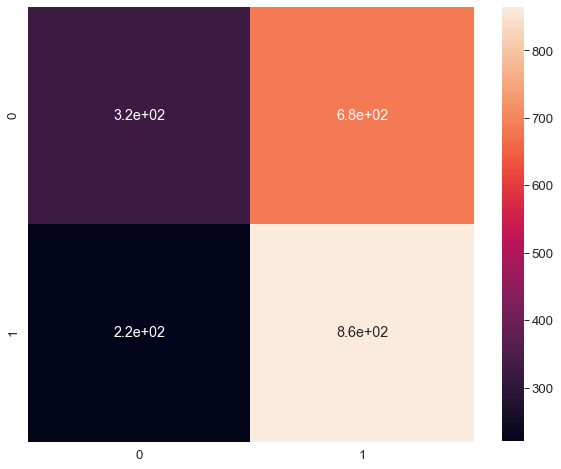

In [172]:
print("Accuracy: %s" % metrics.accuracy_score(y_val, predictions))
print("Confusion matrix:")
plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_val, predictions), annot=True)
plt.show()

Notamos que este modelo tiene una capacidad de acierto que supera por bastante más el 50%. La *accuracy* de nuestro modelo de regresión logística es de 56.7%. Este modelo es preferible a nuestro modelo de 5 de Red Neuronal, a los dos SVM ejecutados y a el modelo KNN , sin embargo, aún se prefiere un modelo de árbol.

Luego de haber revisado cada uno de estos modelos, podemos concluir que **el mejor modelo es el Random Forest Classifier** con 100 árboles. Este modelo es nuestro ganador. Veamos como se comporta a la hora de intentar predecir la data de testeo.

### Ganador: Random Forest (en Testeo)

In [193]:
forest2 = RandomForestClassifier(n_estimators=100)
forest2.fit(X_train, y_train)
predicted = forest2.predict(X_test)

Accuracy: 0.6632183908045977
Confusion matrix:


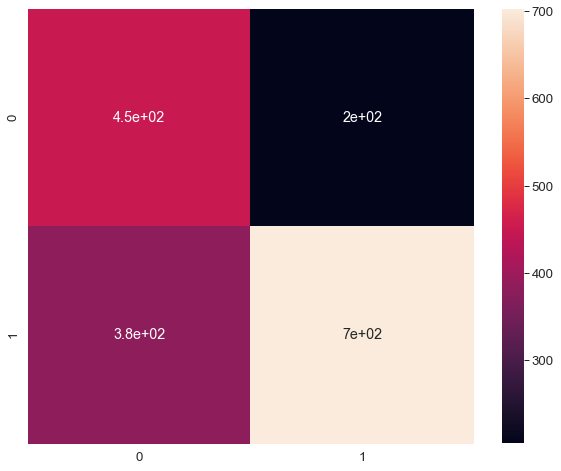

In [194]:
print("Accuracy: %s" % metrics.accuracy_score(y_test, predicted))
print("Confusion matrix:")

plt.figure(figsize = (10,8))
sns.set_style('dark')
sns.set_palette('hls', 100)
sns.set_context('paper', font_scale = 1.5)
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True)
plt.show()

Notamos que nuestro modelo ganador de `Random Forest` con 100 árboles, generaliza bastante bien la data de testeo. Tiene un porcentaje de acierto o *achunte* de al rededor de 66.32%. 

**Comentarios Generales M4:**

En primer lugar, debo decir que fue muy interesante y entretenido ver el funcionamiento y los resultados de cada uno de los distintos modelos representados. Sin embargo, a la vez fue bastante frustrante notar que con las 8 features usadas, que esperaba que íbamos a poder predecir perfectamente que acción era recomendable de comprar o no, el modelo no fue tan poderoso. Este problema se podría arreglar con más features o con más datos. Más datos no podemos conseguir, pero lo que sí podríamos hacer es ampliar o cambiar el set de columnas utilizados para armar la matriz `X`. Pese a que se consideró la opción, se guardaron las ganas de esto para la misión 5, que busca más que nada variar el número de columnas utilizadas y encontrar las 10 mejores para incluir.

## Misión 5: Selección de mejores features

Para esta misión se hará lo siguiente: Se realizarán 10 *for loops*, en que en cada uno de ellos se irá añadiendo una nueva variable o feature a la regresión (se utilizará regresión lineal en esta sección, esto porque como la variable `Return` es continua, me pareció un buen modelo a utilizar), dependiendo cual entrega la mayor el mayor R^2 al añadirse a la regresión.

La dinámica será la siguiente: 

- Partimos con cero features, por lo que el primer for loop, entrenará un modelo de regresión lineal con un solo feature. Se recorrerá cada una de las columnas (válidas a utilizar) y se guardará el nombre de la columna que tenga la mayor accuracy al ser feature de la regresión.

- Luego cuando ya se tenga una variable, se procederá a hacer el segundo *for loop*. En este se recorrerá cada una de las columnas y se entrenará un modelo de regresión lineal. **El modelo que tenga el menor Error Cuadrático Medio** (E.C.M), **en la data de validación** nos señalará cual es la segunda feature a considerar.

- Luego se repite el mismo proceso hasta tener un modelo de regresión lineal con 10 features.


Primero debo agrupar las columnas que puedo utilizar como features. Estas serían todas las de la base de datos menos `Return` (variable y), `Class` (tengo entendido que no era legal usarla, sino lo aplico como supuesto) y el nombre de la acción tampoco la consideraremos.

Hay que tener ojo en *for loops* avanzados, en no agregar columnas a la regresión que ya han sido añadidas, así no tenemos problemas de Independencia lineal.

In [226]:
options = []
for col in train.columns:
    if col != "Return" and col != "Class":
        options.append(col)

Habiendo ya agrupado las posibles opciones de features en la lista `options` podemos proceder a entrenar los 10 modelos. Aprovecho de crear una función que haga más elegantes los for loops futuros.

In [227]:
from sklearn.linear_model import LinearRegression

def regresion(X_t, y_t, X_v, y_v):
    model = LinearRegression()
    model.fit(X_t, y_t)
    predictions = model.predict(X_v)
    accuracy = metrics.mean_squared_error(y_v, predictions) 
    return accuracy

Notamos que para correr un modelo de regresión es necesario que la matriz X, ya sea de entrenamiento o de validación tenga más de una columna. Agregamos entonces una columna de unos a cada vector X, y así tenemos armada la matriz X de features. 

In [228]:
y_t = train["Return"]
y_v = val["Return"]

dimt = train.shape[0]
beta_0t = pd.Series(np.ones(dimt))

dimv = val.shape[0]
beta_0v = pd.Series(np.ones(dimv))

Además aprovecho de definir desde ya, la lista de mejores variables. Se usa una lista, para tener a estas ordenadas de mejor a peor.

In [229]:
ganadoras = []

In [230]:
minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'ROE'

Claramente el último elemento añadido a la lista, es el que tiene el menor ECM. Esto significa, que el modelo con la última variable añadida a la lista `col_ganadora`, que se llama `ROE`, entrenado con la data de entrenamiento de esa columna y validada con la data de validación, es la mejor feature para explicar `Return`.

En lo siguiente haremos nuevamente el mismo proceso, solo que ahora se entrenará un modelo que ya contiene nuestra variable ganadora en el primer loop, en este caso la variable `ROE`.

In [231]:
col1t = train["ROE"]
col1v = val["ROE"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'Free Cash Flow Yield'

Nuestra segunda columna ganadora, es `Free Cash Flow Yield`. Esta columna, no la teníamos contemplada como *importante* en la Misión 1, , sin embargo si se había contemplado que `Free Cash Flow` sola, podría ser una variable importante (tan mal no estabamos jaja). Esta columna, es la segunda columna más fuerte a la hora de predecir nuestra variable `Return`. Ad

Hacemos nuevamente el mismo proceso que antes, para encontrar la tercera mejor variable.

In [232]:
col2t = train["Free Cash Flow Yield"]
col2v = val["Free Cash Flow Yield"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'Preferred Dividends'

La tercera columna ganadora, es `Preferred Dividends`. Lamentablemente esta columna, tampoco fue de las 10 seleccionadas en la Misión 1. Pero igual se sabía que los dividendos tendrían un rol importante para explicar el retorno, por ello se había usado la variable `Dividend per Share`.

In [233]:
col3t = train["Preferred Dividends"]
col3v = val["Preferred Dividends"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'cashRatio'

Nuestra cuarta columna ganadora es `cashRatio`. Esta es otra columna, que no teníamos incorporada desde la misión 1, pero que tiene mucho que ver con la variable que habíamos contemplado `Free Cash Flow`.

Veamos que pasa con las siguientes variables.

In [234]:
col4t = train["cashRatio"]
col4v = val["cashRatio"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, col4t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, col4v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'Payables'

La quinta columna ganadora es `Payables`. Sigamos.

In [235]:
col5t = train["Payables"]
col5v = val["Payables"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, col4t, col5t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, col4v, col5v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'Effect of forex changes on cash'

La sexta feature ganadora es `Effect of forex changes on cash`. Sigamos.

In [236]:
col6t = train["Effect of forex changes on cash"]
col6v = val["Effect of forex changes on cash"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, col4t, col5t, col6t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, col4v, col5v, col6v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'Tax assets'

La séptima feature es `Tax assets`. Sigamos.

In [237]:
col7t = train["Tax assets"]
col7v = val["Tax assets"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, col4t, col5t, col6t, col7t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, col4v, col5v, col6v, col7v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'10Y Revenue Growth (per Share)'

La octava feature es `10Y Revenue Growth (per Share)`. Seguimos.

In [238]:
col8t = train["10Y Revenue Growth (per Share)"]
col8v = val["10Y Revenue Growth (per Share)"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, col4t, col5t, col6t, col7t, col8t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, col4v, col5v, col6v, col7v, col8v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)
        
winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'companyEquityMultiplier'

La novena feature es `companyEquityMultiplier`. Esta variable, podría representar lo que buscabamos explotar al agregar la variable `Goodwill and Intangible Assets` en los modelos de la misión 4. Se buscaba explotar el efecto de *inmaterial* de la compañía sobre el retorno.

Sigamos.

In [239]:
col9t = train["companyEquityMultiplier"]
col9v = val["companyEquityMultiplier"]

minimo = np.inf
col_ganadora = []
for col in options:
    X_t = train[col]
    X_t = pd.concat([beta_0t, col1t, col2t, col3t, col4t, col5t, col6t, col7t, col8t, col9t, X_t], axis=1)
    X_v = val[col]
    X_v = pd.concat([beta_0v, col1v, col2v, col3v, col4v, col5v, col6v, col7v, col8v, col9v, X_v], axis=1)  
    acc = regresion(X_t, y_t, X_v, y_v)
    if acc < minimo:
        minimo = acc  
        col_ganadora.append(col)

winner = col_ganadora[-1]
ganadoras.append(winner)
winner

'debtEquityRatio'

In [240]:
ganadoras

['ROE',
 'Free Cash Flow Yield',
 'Preferred Dividends',
 'cashRatio',
 'Payables',
 'Effect of forex changes on cash',
 'Tax assets',
 '10Y Revenue Growth (per Share)',
 'companyEquityMultiplier',
 'debtEquityRatio']

La décima feature es `debtEquityRatio`. Ahora que ya encontramos las 10 mejores variables, tenemos listo nuestro modelo de regresión lineal que contiene a las 10 mejores features de toda la base de datos, para predecir el retorno de una acción. Las 10 variables ganadoras son las siguientes:

1. ROE
2. Free Cash Flow Yield
3. Preferred Dividends
4. cashRatio
5. Payables
6. Effect of forex changes on cash
7. Tax assets
8. 10Y Revenue Growth (per Share)
9. companyEquityMultiplier
10. debtEquityRatio

Lamentablemente, de las 10 variables que habíamos pronosticado en la Misión 1 que supuestamente eran *ultra importantes*, nos damos cuenta que esto no era así. Si bien, muchas de las columnas representaban variables parecidas a algunas por las cuales nosotros habíamos apostado, casi ninguna calzó perfectamente (solo la décima de `debtEquityRatio`.

Sobre cambios en la Misión 2, estos cambios no fueron necesarios ya que en la misión 2 se hizo un trabajo riguroso de limpieza y depuración. Si bien, podría haber sido mejor volver a la misión 2 y ser más detallista en la Limpieza, imputación y depuración de estas 10 columnas ganadoras, como lamentablemente no tengo mucho tiempo, no alcancé a hacerlo. Espero que no afecta tanto las respuestas y resultados. 

Por otro lado, de clases entendí, que no es necesario que cambie los features usados en esa misión, por lo que tampoco hice cambios en esa misión.

Ahora veamos como se comporta este modelo de 10 features con la data de testeo. Para ello debemos definir las matrices X con las 10 features respectivas y los vectores y de la data de training y de testeo.

In [241]:
X_tr = train[ganadoras]
y_tr = train["Return"]
X_te = test[ganadoras]
y_te = test["Return"]
acc = regresion(X_tr, y_tr, X_te, y_te)
print(acc)

2217.7000254689924


El error cuadrático medio de nuestro modelo de regresión, entrenado con el set de entrenamiento `train`, en el set de testeo es de 3541,63. Esta cifra hace referencia de su capacidad de generalización.

**Comentarios Generales M5:** En esta misión se implementó una técnica, quizás no muy indicada para encontrar las 10 mejores variables. A mi gusto, es bien intuitiva y me hizo sentido su aplicación